# Computational Theory Tasks
## By Luke Corcoran
### G00410404

In [97]:
# Define necessary imports
import numpy as np
import tempfile
import os
import time
import math
import hashlib
import itertools
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Task 1: Binary Representations
Manipulating binary representations is done as part of the **Secure Hash Standard (SHS)** algorithms [1]. The [National Institute of Standards and Technology (2015)](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) note that the primary reason for these manipulations is to generate 'digests' of messages, which are condensed representations of electronic data [1].


The primary function of generating message digests is to verify if messages have remained unaltered since the time the digests were originally created [1]. The algorithms specified in the Standard allow for the identification of the message’s integrity [1]. This occurs because any modification to the message will almost certainly produce a different digest [1].


The **manipulation of binary representations** is the fundamental mechanism by which these hash algorithms operate. The hash computation process involves iteratively generating a series of hash values using a message schedule, functions, constants, and word operations [1]. These word operations are specifically defined binary manipulations that operate on fixed-size groups of bits called "words".


The specific operations used to manipulate the binary representations of words include:

- **Bitwise logical word operations:** AND, OR, XOR, and complement.
- **Addition modulo 2^w:** Where 'w' is the word size (32 or 64 bits, depending on the specific SHA algorithm). This operation is defined by adding the integer values represented by the words and taking the remainder modulo 2^w.
- **Left-shift operation (<<):** Obtained by discarding bits furthest to the left and padding with zeros on the right.
- **Right-shift operation (>> or SHR n (x)):** Obtained by discarding bits furthest to the right and padding with zeros on the left.
- **Rotate operations (ROTR/ROTL):** For circular shifts.


These binary manipulations are defined within the functions used by the algorithms, such as the Ch, Maj, Sigma0, and sigma0 functions for SHA-224 and SHA-256, which combine bitwise logic, shifts, and rotations [1].
Beyond message integrity, the characteristic where any modification to the message produces a different digest can also facilitate digital signature creation and validation, message authentication code verification, and random number generation [1].

The following functions introduce binary operations used in Secure Hash Standard algorithms for message digest creation, providing implementations of the bit manipulation operations that form the foundation of cryptographic hash functions.


## Function 1: rotl(x, n=1) (Left Rotation)
The **ROTL (Rotate Left)** operation is fundamental in the SHA-1 algorithm and represents a circular left shift [1]. It performs a shift of x by n positions to the left. The `rotl` function defined below performs a left rotation on a 32-bit unsigned integer. Left rotation shifts bits to the left by `n` positions, wrapping around the bits that overflow beyond the 32-bit boundary. This implementation uses [bitwise shift operators (`<<` and `>>`)](https://www.geeksforgeeks.org/python3-program-to-rotate-bits-of-a-number/) to perform the rotation, combining the left shift with a right shift of the remaining bits.


### Example I/O: 
**Input:**  
```
x = 0b11001010101100000000000000000000
n = 3
```

**Output:** 
``` 
0b010101011000000000000000000110
```

In [2]:
# Rotate bits of x to the left by n positions.
def rotl(x, n=1):
    bits = 32 # Number of bits in an integer
    n = n % bits  # Ensure n is within the range of 0-31
    return ((x << n) & 0xFFFFFFFF) | (x >> (bits - n)) # Rotate bits to the left by n positions

## Test 1: Basic Usage
This test verifies the basic functionality of the `rotl()` function by rotating a 32-bit unsigned integer by 3 positions to the left. A set expected result is compared with the actual output from the function. The test confirms that bits shifted beyond the left boundary correctly wrap around to the right side.


In [3]:
x = 0b11001010101100000000000000000000 # Input 32-bit integer
n = 3  # Number of positions to rotate left
expected = 0b001010101100000000000000000000110  # Expected result after rotating left by 3 bits
result = rotl(x, n)  # Call rot1 function with 32-bit unsigned integer

# Display the results
print(f"Input: x = {bin(x)}, n = {n}")
print(f"Expected: {bin(expected)}")
print(f"Result:   {bin(result)}") 
print(f"Test passed: {result == expected}")  # Show if test was successful

Input: x = 0b11001010101100000000000000000000, n = 3
Expected: 0b1010101100000000000000000000110
Result:   0b1010101100000000000000000000110
Test passed: True


## Test 2: Edge Cases
This test examines two important edge cases for bit rotation: rotating by exactly 32 bits (a full rotation) and rotating by 0 bits (no rotation). In both scenarios, the output should match the original input value since rotating by the full bit-width returns to the original state, and rotating by zero bits makes no changes. This test ensures the function handles these boundary conditions correctly.

In [4]:
x = 0b10101010101010101010101010101010 # 32-bit integer
result1 = rotl(x, 32)  # Rotate by exactly 32 bits (full rotation)
result2 = rotl(x, 0)   # Rotate by 0 bits (no rotation)

print(f"Original:     {bin(x)}") 
print(f"Rotated by 32: {bin(result1)}")  # Display result after 32-bit rotation
print(f"Rotated by 0:  {bin(result2)}")  # Display result after 0-bit rotation
print(f"Test passed: {result1 == x and result2 == x}") 

Original:     0b10101010101010101010101010101010
Rotated by 32: 0b10101010101010101010101010101010
Rotated by 0:  0b10101010101010101010101010101010
Test passed: True


## Function 2: rotr(x, n=1) (Right Rotation)
The **ROTR (Rotate Right)** operation, similar to ROTL, is fundamental in many cryptographic algorithms and represents a circular right shift [1]. It performs a shift of x by n positions to the right. The `rotr` function defined below performs a right rotation on a 32-bit unsigned integer. Right rotation shifts bits to the right by `n` positions, wrapping around the bits that overflow beyond the 32-bit boundary. Just like in the `rotl` function, it uses [bitwise shift operators (>> and <<)](https://www.geeksforgeeks.org/python3-program-to-rotate-bits-of-a-number/) to perform the rotation, combining the right shift with a left shift of the remaining bits.
### Example I/O: 
**Input:**  
```
x = 0b00000000000000000000110010101011
n = 3
```

**Output:** 
``` 
0b01100000000000000000000110010101

```

In [5]:
# Rotate bits of x to the right by n positions.
def rotr(x, n=1):
    bits = 32  # Number of bits in an integer
    n = n % bits  # Ensure n is within the range of 0-31
    return ((x >> n) | (x << (bits - n))) & 0xFFFFFFFF  # Rotate bits to the right by n positions

## Test 1: Basic Usage
Just like the basic usage test for the `rotl()` function, this test verifies the basic functionality of the `rotr()` function by rotating a 32-bit unsigned integer by 3 positions, but this time to the right. A set expected result is compared with the actual output from the function. The test confirms that bits shifted beyond the right boundary correctly wrap around to the left side.

In [6]:
x = 0b00000000000000000000110010101011  # 32-bit integer
n = 3  # Number of positions to rotate right

# Right rotation by 3 should put the 3 bits furthest to the right, at the left
expected = 0b01100000000000000000000110010101 
result = rotr(x, n)  # Call rotr function with 32-bit unsigned integer

# Display the results
print(f"Input: x = {bin(x)}, n = {n}")
print(f"Expected: {bin(expected)}")
print(f"Result:   {bin(result)}")
print(f"Test passed: {result == expected}")  # Test passed if result matches expected

Input: x = 0b110010101011, n = 3
Expected: 0b1100000000000000000000110010101
Result:   0b1100000000000000000000110010101
Test passed: True


## Test 2: Edge Cases
Also similarly to the edge cases test for the `rotl()` function, this test examines a full rotation (rotating by 32 bits) and no rotation (rotating by 0 bits). In both scenarios, the output should match the original input value since rotating by the full bit-width returns to the original state, and rotating by zero bits makes no changes.

In [7]:
x = 0b10101010101010101010101010101010  # 32-bit integer
result1 = rotr(x, 32)  # Rotate by full 32 bits (should be identical to input)
result2 = rotr(x, 0)   # Rotate by 0 bits (should be identical to input)

print(f"Original:     {bin(x)}")
print(f"Rotated by 32: {bin(result1)}") # Display result after 32-bit rotation
print(f"Rotated by 0:  {bin(result2)}") # Display result after 0-bit rotation
print(f"Test passed: {result1 == x and result2 == x}") # Test passed if both results match input

Original:     0b10101010101010101010101010101010
Rotated by 32: 0b10101010101010101010101010101010
Rotated by 0:  0b10101010101010101010101010101010
Test passed: True


## Function 3: ch(x, y, z) (Bitwise Choice)
The **CH (Choice)** operation is commonly used in cryptographic hash functions like SHA-256 and acts as a bitwise conditional selection (XOR) [1]. It performs a bit-by-bit selection between two values based on a control value. The `ch` function defined below implements this conditional selection on unsigned integers. For each bit position, if the corresponding bit in `x` is 1, the output bit comes from `y`; if the bit in `x` is 0, the output bit comes from `z`. This implementation uses [bitwise operators (&, ^, and ~)](https://docs.python.org/3/library/stdtypes.html#bitwise-xor
) to perform a [Bitwise XOR](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/binary_representations.ipynb).
### Example I/O:
**Input:**
```
x = 0b10101010101010101010101010101010
y = 0b11111111111111110000000000000000
z = 0b00000000000000001111111111111111
```
**Output:**
```
0b11111111111111111111111111111111
```

In [8]:
# Choose bits from y where x has bits set to 1, and bits from z where x has bits set to 0.
def ch(x, y, z):
    return (x & y) ^ (~x & z)  # Select bits from y where x is 1, otherwise from z

## Test 1: Basic Usage

This test verifies the basic functionality of the `ch()` function by demonstrating its bitwise selection behaviour. Input values are provided for `x`, `y`, and `z`, where `x` serves as the input that determines whether bits are chosen from `y` (when corresponding bits in `x` are 1) or from `z` (when bits in `x` are 0). An expected result is compared with the function's actual output to confirm bitwise selection works as intended.

In [9]:
x = 0b11001010101  # Input value
y = 0b10101010101  # Value to select from when x bit is 1
z = 0b01010101010  # Value to select from when x bit is 0

expected =  0b10011111111 # Expected output for ch function
result = ch(x, y, z)  # Compute ch function

# Display input values and expected result
print(f"Input: x = {bin(x)}, y = {bin(y)}, z = {bin(z)}")
print(f"Expected: {bin(expected)}")  
print(f"Result:   {bin(result)}") 
print(f"Test passed: {result == expected}")  # Passes if result matches expected

Input: x = 0b11001010101, y = 0b10101010101, z = 0b1010101010
Expected: 0b10011111111
Result:   0b10011111111
Test passed: True


## Test 2: Edge Cases

This test examines two important edge cases for the bitwise choice function: when `x` contains all 1's and when `x` contains all 0's. In the first scenario, when `x` is all 1's, the output should be identical to `y` since every bit is selected from `y`. In the second scenario, when `x` is all 0's, the output should be identical to `z` since every bit is selected from `z`. These tests confirm the function behaves correctly at these boundaries.

In [10]:
xAllOnes = 0b11111111111111111111111111111111 # When x is all 1s, output should be exactly y
y = 0b10101010101  # Value to select from when x bit is 1
z = 0b10101010100   # Value to select from when x bit is 0
result1 = ch(xAllOnes, y, z)

xAllZeros = 0 # When x is all 0s, output should be exactly z
result2 = ch(xAllZeros, y, z)

# Display results for all 1s and all 0s cases
print(f"y = {bin(y)}, z = {bin(z)}")
print(f"When x is all 1s - Expected: {bin(y)}, -- Result: {bin(result1)}")
print(f"When x is all 0s - Expected: {bin(z)},  -- Result: {bin(result2)}")
print(f"Test passed: {result1 == y and result2 == z}") # Test passed if results match expected values

y = 0b10101010101, z = 0b10101010100
When x is all 1s - Expected: 0b10101010101, -- Result: 0b10101010101
When x is all 0s - Expected: 0b10101010100,  -- Result: 0b10101010100
Test passed: True


## Function 4: maj(x, y, z) (Bitwise Majority)
The **MAJ (Majority)** operation is commonly used in cryptographic hash functions and represents a bitwise majority vote [1]. It performs a bit-by-bit majority decision across three input values. The `maj` function defined below implements this majority operation on unsigned integers. For each bit position, if two or more of the corresponding bits in `x`, `y`, and `z` are 1, then the output bit is 1; otherwise, it's 0. This implementation uses bitwise operators including [Bitwise AND ( & )](https://docs.python.org/3/library/stdtypes.html#bitwise-or) and [Bitwise OR ( | )](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/binary_representations.ipynb) to compute the majority vote by checking all possible combinations where at least two inputs have 1-bits at a given position.

### Example I/O:
**Input:**
```
x = 0b110010101011
y = 0b101010101010
z = 0b010101010101
```

**Output:**
```
0b110010101011
```

In [11]:
# Compute the majority vote for each bit position in x, y, and z
def maj(x, y, z):
    return (x & y) | (y & z) | (x & z)  # Majority function: At least two bits must be 1

## Test 1: Basic Usage

This test verifies the basic functionality of the `maj()` function by demonstrating its bitwise majority voting behaviour. Values for `x`, `y`, and `z` are provided, to confirm the function correctly implements the majority rule: for each bit position, if at least two of the three input bits are 1, the output bit is 1; otherwise it's 0. The expected result is calculated manually and compared with the function's actual output to confirm the function works as intended.

In [12]:
# Test input values
x = 0b110010101011
y = 0b101010101010
z = 0b010101010101 

# maj returns 1 if at least two inputs have 1, otherwise 0. In this case, majority of 1s is 0b110010101011
expected = 0b110010101011 
result = maj(x, y, z)

# Display input values and expected vs actual results
print(f"Input: x = {bin(x)}, y = {bin(y)}, z = {bin(z)}")
print(f"Expected: {bin(expected)}")
print(f"Result:   {bin(result)}")
print(f"Test passed: {result == expected}") # Test passed if result matches expected

Input: x = 0b110010101011, y = 0b101010101010, z = 0b10101010101
Expected: 0b110010101011
Result:   0b110010101011
Test passed: True


## Test 2: Edge Cases

This test examines edge cases for the bitwise majority function, specifically when two inputs contain all 1's or all 0's. When any two inputs are all 1's, the output should be all 1's regardless of the third input, since the majority (two out of three) will always be 1 at every position. Conversely, when any two inputs are all 0's, the output should be all 0's regardless of the third input. These tests confirm the function behaves correctly at these boundaries.

In [13]:
# Test input values. When any two inputs are all 1s, output should be all 1s
xAllOnes = 0b11111111111111111111111111111111
yAllOnes = 0b11111111111111111111111111111111
z = 0b010101010101

result1 = maj(xAllOnes, yAllOnes, z)

# When any two inputs are all 0s, output should be all 0s
xAllZeros = 0
yAllZeros = 0
result2 = maj(xAllZeros, yAllZeros, z) 

# Display results for all 1s and all 0s cases
print(f"z = {bin(z)}")
print("When x and y are all 1s:")
print(f"Expected: {bin(0b11111111111111111111111111111111)} -- Result: {bin(result1)}")
print("When x and y are all 0s:")
print(f"Expected: {bin(0)} -- Result: {bin(result2)}")
print(f"Test passed: {result1 == 0b11111111111111111111111111111111 and result2 == 0}") 

z = 0b10101010101
When x and y are all 1s:
Expected: 0b11111111111111111111111111111111 -- Result: 0b11111111111111111111111111111111
When x and y are all 0s:
Expected: 0b0 -- Result: 0b0
Test passed: True


# Task 2: Hash Functions
**Manipulating hash values** is done as part of hash table lookup algorithms [2]. [Kernighan and Ritchie (1988)](https://www.cimat.mx/ciencia_para_jovenes/bachillerato/libros/%5BKernighan-Ritchie%5DThe_C_Programming_Language.pdf) provide an implementation of an algorithm which functions as a hash-search, converting a word into a positive integer (hash value) [2].
The primary function of this algorithm is to allow for searching within hash tables by using the generated integer as an index [2]. The algorithm serves as the basis for Java's [hashCode()](https://www.geeksforgeeks.org/java-string-hashcode-method-with-examples/), which is used to return a String's hash value. 

The `hash` function defined below is a Python version of Kernighan and Ritchie's algorithm, which works by iteratively processing each character in the input string and combining it with previously processed characters in a way that distributes values evenly across the hash table. 
- [The algorithm uses 31 as a multiplier](https://www.geeksforgeeks.org/why-does-javas-hashcode-in-string-use-31-as-a-multiplier/) due to its nature as a prime number, which creates different distributions of keys in the array. When using a prime multiplier, the same key (e.g. "DEV") would generate different hash values (e.g. D31 + E31 + V*31) compared to using a non-prime multiplier (e.g. 30), resulting in better distribution of values across the hash table. 
- [101 is used as the modulo value](https://www.designgurus.io/answers/detail/why-should-hash-functions-use-a-prime-number-modulus) for the hash function because it constrains the output to a fixed range (0-100) that can be directly used as an index in a hash table of size 101. As a prime, 101 has no common factors with other numbers except 1, allowing hash values to spread evenly across all buckets (array slots where elements with the same hash value are stored) rather than clustering in predictable patterns. This helps to reduce collisions and improve overall performance.


The `hash` function initializes a hash value at 0 and loops through each character of the input string. Using [`ord()`](https://docs.python.org/3/library/functions.html#ord), each character is converted to an integer, multiplied by 31, and combined with the current hash value. The result is reduced to a fixed range using the modulo operator (101).

### Example I/O:
**Input:**
```
"hello"
```

**Output:**
```
17
```


In [14]:
def hash(s: str, multiplier: int = 31, modulo: int = 101) -> int:
    hashval = 0  # Initialize hash value to 0
    
    for char in s:
        # Add character value and multiply by prime multiplier
        hashval = ord(char) + multiplier * hashval
    
    # Keep hash in range 0-100
    return hashval % modulo

## Test 1: Testing Basic Functionality
This test verifies the basic functionality of the `hash()` function by testing it with a simple input string, "hello". The test calculates the hash value using the `hash()` function and compares it with the expected value of 17. This confirms the function is correctly implementing Kernighan and Ritchie's hash algorithm with the specified multiplier (31) and modulo (101) parameters. The test passes when the calculated hash matches the expected result.

In [15]:
testString = "hello"  # Test string
result = hash(testString)  # Calculate the hash value of the string

expected = 17  # Expected hash value for "hello" using the hash function

# Output test results for verification
print(f"String: '{testString}'")
print(f"Expected hash value: {expected}")
print(f"Calculated hash value: {result}")
print(f"Test passed: {result == expected}")  # Test passed if result matches expected value

String: 'hello'
Expected hash value: 17
Calculated hash value: 17
Test passed: True


## Test 2: Showcasing why 31 is chosen
This test demonstrates why **prime numbers like 31** are preferred as multipliers in hash functions. By comparing the hash distribution quality between prime and non-prime multipliers, we can observe how prime multipliers create more unique hash values for similar input strings. The multiplier 31 is specifically chosen because it's a prime number that provides good distribution characteristics while remaining computationally efficient.

In [16]:
# Test strings with similar patterns
similarStrings = [
        "abc", "acb", "bac", "bca", "cab", "cba", 
        "aaa", "bbb", "abc1", "abc2"              
    ]

# Compare prime vs non-prime multipliers
primeMultipliers = [3, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 101]
nonPrimeMultipliers = [1, 4, 6, 8, 9, 10, 12, 15, 16, 20, 24, 25, 32, 36, 100]

# Initialize counters for prime and non-prime multipliers
results = {"Prime": 0, "Non-Prime": 0}

The code below measures **hash distribution quality** by calculating the ratio of hash values to total inputs. A higher ratio indicates better distribution. For each multiplier (both prime and non-prime), the test generates hash values for all strings in the `similarStrings` collection. The `uniqueRatio` variable represents how well the hash function distributes these similar inputs across the hash space. Prime multipliers like 31 should theoretically produce higher uniqueness ratios compared to non-prime multipliers.

- The process begins with two loops - one iterating through prime multipliers and another through non-prime multipliers. 
- In each iteration, the `hash` function is applied to every string in the `similarStrings` collection using the current multiplier. 
- For each multiplier, a `uniqueRatio` is calculated by dividing the number of hash values by the total number of strings, while using a [`set()`](https://www.geeksforgeeks.org/python-ways-to-remove-duplicates-from-list/) conversion to eliminate duplicates. This ratio represents the distribution quality - higher values indicate better distribution. 
- The calculated `uniqueRatio` for each multiplier is stored in the corresponding "Prime" or "Non-Prime" category in the results dictionary, which will later be used to calculate the average distribution quality for each multiplier type.

In [17]:
# Test hash distribution for prime multipliers
for multiplier in primeMultipliers:
    hashValues = [hash(s, multiplier) for s in similarStrings] # Create hash values using the hash function
    uniqueRatio = len(set(hashValues)) / len(similarStrings) # Calculate distribution quality (unique values / total)
    results["Prime"] += uniqueRatio

# Test hash distribution for non-prime multipliers
for multiplier in nonPrimeMultipliers:
    hashValues = [hash(s, multiplier) for s in similarStrings] # Create hash values
    uniqueRatio = len(set(hashValues)) / len(similarStrings) # Calculate distribution quality
    results["Non-Prime"] += uniqueRatio 

The final section calculates the **average distribution quality** for both prime and non-prime multipliers. By averaging the ratios across the multipliers in each category, we can measure which type of multiplier provides better overall performance. It is shown that prime multipliers (including 31) produce better hash distribution quality than non-prime multipliers, hence justifying the use of 31 in the `hash` function.

In [18]:
# Calculate average distribution quality
results["Prime"] /= len(primeMultipliers)
results["Non-Prime"] /= len(nonPrimeMultipliers)

# Print results
print(f"Average distribution quality:")
print(f"  Prime multipliers: {results['Prime']:.2f}")
print(f"  Non-Prime multipliers: {results['Non-Prime']:.2f}")
print(f"\nCONCLUSION: {'Prime' if results['Prime'] > results['Non-Prime'] else 'Non-Prime'} " +
        "multipliers produce better hash distribution quality")

Average distribution quality:
  Prime multipliers: 0.95
  Non-Prime multipliers: 0.91

CONCLUSION: Prime multipliers produce better hash distribution quality


## Test 3: Showcasing why 101 is chosen
This test demonstrates why **101** is chosen as the modulo value in the hash function implementation. As mentioned earlier, using a prime number like 101 as the modulo value helps constrain the output to a fixed range (0-100) while ensuring hash values spread evenly across all possible buckets. Since 101 is prime, it has no common factors with other numbers except 1, which helps reduce collisions in hash tables. This test compares the bucket distribution between a non-prime table size (100) and a prime table size (101) to demonstrate the advantage of using prime numbers for hash table sizes.

In [19]:
values10 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # Test values, multiples of 10
values25 = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250] # Test values, multiples of 25
testValues = values10 + values25 # Combine test values 
tableLengths = {"Non-prime (100)": 100, "Prime (101)": 101} # Test prime vs non-prime table sizes

The code below analyzes how test values **distribute across buckets** when using different table lengths. It takes various test values (multiples of ten and twenty-five) and applies the modulo operation with both a non-prime (100) and a prime (101) table size. 

- For each table length, the code first creates an empty dictionary (`buckets`) to track populated buckets. 
- Then for each test value, it calculates a bucket index using the modulo operation, initializes the bucket as an empty list if needed, and appends the current value to its corresponding bucket. 
- Finally, it counts and calculates what percentage of buckets were used. 

The results clearly demonstrate the advantage of using a prime modulo - with **101**, almost **18%** of buckets are used, while with **100**, only **12%** of buckets are used. This confirms that prime numbers help distribute values more evenly across available buckets, reducing clustering and collisions in hash tables.

In [20]:
# Loop through each table length and test the distribution of values
for name, tableLength in tableLengths.items():
    buckets = {} # Track populated buckets

    # Hash each value and store in corresponding bucket
    for val in testValues:
        index = val % tableLength # Calculate bucket index using modulo operation
        
        if index not in buckets: # Initialize bucket if not present
            buckets[index] = []
            
        buckets[index].append(val) # Store value in its bucket
    
    usedBuckets = len(buckets)  # Count distinct buckets used
    print(f"\n{name}:")
    print(f"  Buckets used: {usedBuckets} out of {tableLength} ({usedBuckets/tableLength*100:.1f}%)")


Non-prime (100):
  Buckets used: 12 out of 100 (12.0%)

Prime (101):
  Buckets used: 18 out of 101 (17.8%)


# Task 3: SHA256 Padding
The [SHA-256 algorithm](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) is a cryptographic hash function which encrypts data through a series of preprocessing steps. **Padding** is one of the three steps in the algorithm, alongside parsing and setting initial hash values, with its fundamental purpose being to ensure a message's total length is a multiple of 512 bits, which allows for subsequent processing in 512-bit blocks [1]. 

**The padding process follows a specific sequence:**
- **Append the bit "1"** to the end of a message.
- Then, append ***k* zero bits** so that the total length of the message (after adding the 1-bit) plus these zero bits equals 448 bits % 512. 
- Finally, append a **64-bit number** that represents the original message's length in bits. This number is written in big-endian format (most significant byte first). 

After padding is applied, the message length becomes a multiple of 512 bits [1]. This allows the message to be parsed into the algorithm's 512-bit blocks and subsequently processed to generate the final hash value [1].

The `sha256Padding()` function below provides an implementation of the SHA-256 padding algorithm. 
- Firstly, it reads the input file in [binary mode](https://chatgpt.com/share/68169237-6f20-800f-846f-f816ae0256f0) and stores the data from the file. 
- Then, it appends the required "1" bit (represented as the byte `0x80`) using [`bytearray()`](https://www.geeksforgeeks.org/python-bytearray-function/). 
- Next, it calculates and adds zero bytes until the length % 512 bits equals 448 bits, using a while loop that checks if the current length in bits (multiplied by 8 to convert bytes to bits) % 512 is equal to 448. If not, it appends another zero byte (`0x00`). 
- Finally, it appends the original message length as a [64-bit big-endian value,](https://chatgpt.com/c/68169493-4908-800f-a07b-52b8439c4721) using the length of the original data multiplied by 8 (to convert bytes to bits) and formatting it as an 8-byte big-endian representation. 
- The function concludes by returning the padding portion in [hexadecimal format,](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/sha256.ipynb) joining the byte values and formatting each as a two-digit value.


### Example I/O:
**Input:**
```
01100001 01100010 01100011
```

**Output:**
```
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 18
```

In [21]:
def sha256Padding(filePath):
    # Read file and initialize padding
    with open(filePath, 'rb') as file:
        data = file.read()
    
    # Create padded data with 1-bit appended (0x80)
    paddedData = bytearray(data) + bytearray([0x80])
    
    # Add zeros until the length % 512 is equal to 448
    while (len(paddedData) * 8) % 512 != 448:
        paddedData.append(0x00)
    
    # Add original length as 64-bit big-endian value
    paddedData.extend((len(data) * 8).to_bytes(8, "big"))
    
    # Return padding portion in hex format
    return " ".join(f"{b:02x}" for b in paddedData[len(data):])

### Function to Create a Temporary Test File

The `createTestFile` function is used in the subsequent tests for generating test files with specified binary content.
- Firstly, it creates a new temporary directory using [`tempfile.mkdtemp()`](https://www.geeksforgeeks.org/create-temporary-files-and-directories-using-python-tempfile/) to make sure test files don't interfere with existing files. 
- Then, it generates a full path for the test file by joining the temporary directory with `"test.bin"` using [`os.path.join()`](https://chatgpt.com/c/68169b38-aa1c-800f-a5e6-9a16a10d2993).
- Next, it opens this path in binary write mode [`('wb')`](https://www.tutorialspoint.com/How-to-write-binary-data-to-a-file-using-Python#:~:text=Open%20the%20File%20in%20Binary%20Mode&text=file_path%20%3D%20%22path%2Fto%2F,is%20properly%20closed%20after%20writing.) and writes the provided binary content to the file.
- Finally, it returns both the file path and temporary directory, allowing tests to both access the file and clean up afterward.

In [22]:
def createTestFile(content):
    tempdir = tempfile.mkdtemp()  # Create a new temporary directory
    path = os.path.join(tempdir, "test.bin")  # Generate full path for test file
    with open(path, "wb") as f: f.write(content)  # Write binary content to file
    return path, tempdir  # Return both file path and directory

## Test 1: Example Usage
This test demonstrates a basic use of the `sha256Padding()` function with a simple input string `"abc"`.

- Firstly, it creates a test file containing the three bytes `"abc"` using the `createTestFile()` function. Note that `"abc"` is 24 bits long (3 characters * 8 bits per character).
- Then, it applies the SHA-256 padding to this test file by calling the `sha256Padding()` function with the generated file path.
- Next, it defines the expected padding result: `"80"` (the appended 1-bit as byte 0x80), followed by enough zeros to reach 448 bits, and finally `"18"` (the 64-bit big-endian representation of the original message length, 24 in decimal).
- It compares the actual output with the expected result, printing both values and a pass/fail message based on their equality.
- Finally, it uses both [`os.remove()` and `os.rmdir()`](https://www.geeksforgeeks.org/delete-a-directory-or-file-using-python/) to clean up by removing the temporary test file and directory, avoiding issues in subsequent tests.

In [23]:
# Create test file with "abc" content and apply padding.
path, tempdir = createTestFile(b"abc") # "abc" is 24 bits long (3 characters * 8 bits per char)
output = sha256Padding(path) # Apply SHA-256 padding to the test file

# Compare expected vs actual padding result
expected = "80 " + "00 " * 52 + "00 00 00 00 00 00 00 18"  # 0x80=appended 1-bit, zeros for padding, 0x18=24 in hex
print(f"Expected: {expected}")
print(f"Actual: {output}")
print(f"Test passed: {output == expected}")  # Test passed if output matches expected value

# Cleanup temporary file and directory
os.remove(path)
os.rmdir(tempdir)

Expected: 80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18
Actual: 80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18
Test passed: True


## Test 2: Single One Bit
This test verifies the `sha256Padding()` behaviour with an edge case of a single byte with all bits set to 1.

- Firstly, it creates a test file containing a single byte with all bits set to 1 (`"\xFF"`) using the `createTestFile()` function.
- Then, it applies the SHA-256 padding to this test file by calling the `sha256Padding()` function with the generated file path.
- Next, it extracts the first byte of the padding result by splitting the output string and getting the first element.
- It verifies that this first byte is `"80"`, which represents the appended 1-bit, and prints a pass/fail message based on the comparison.
- Finally, it performs cleanup by removing the temporary test file and directory, preventing issues in subsequent tests

In [24]:
# Create a test file with a single byte (0xFF) and apply padding
path, tempdir = createTestFile(b"\xFF")  # Single byte with all bits set to 1
output = sha256Padding(path) # Apply SHA-256 padding to the test file

# Extract and verify the first byte of padding is 0x80 (appended 1-bit)
firstByte = output.split()[0]  # Get first byte from the space-separated output
print(f"First byte is {firstByte}, should be 80: {'Passed' if firstByte == '80' else 'Failed'}")  # Verify correct padding

# Cleanup
os.remove(path)
os.rmdir(tempdir)

First byte is 80, should be 80: Passed


## Test 3: Multiple Of 512 Bits
This test verifies that `sha256Padding` correctly handles input files of various sizes, ensuring the final padded message length is always a multiple of 512 bits (64 bytes).

* Firstly, it tests multiple input sizes by creating test files with various sizes based on each input.
* Then, it applies the SHA-256 padding to each test file by calling the `sha256Padding()` function with the generated file path.
* Next, it calculates the total padded message length by counting the number of bytes in the padding output and adding it to the original input size.
* It verifies that the total padded message length is always a multiple of 64 bytes (512 bits), printing a pass/fail message for each input.
* Finally, it performs cleanup by removing each temporary test file and directory after testing, preventing issues in subsequent tests.

In [25]:
# Test padding for various input sizes
for size in [0, 3, 55, 64, 65, 128, 512, 1024]:
    path, tempdir = createTestFile(b"A" * size)  # Create test files of different sizes
    output = sha256Padding(path) # Apply padding function to the test file

    paddingBytes = len(output.split())  # Count bytes added during padding
    totalBytes = size + paddingBytes  # Calculate final message length after padding
    
    # Verify the padded message length is a multiple of 64 bytes (512 bits)
    print(f"Size {size}: total bytes {totalBytes}, multiple of 64: {'Yes' if totalBytes % 64 == 0 else 'No'}")
    
    # Cleanup
    os.remove(path)
    os.rmdir(tempdir)

Size 0: total bytes 64, multiple of 64: Yes
Size 3: total bytes 64, multiple of 64: Yes
Size 55: total bytes 64, multiple of 64: Yes
Size 64: total bytes 128, multiple of 64: Yes
Size 65: total bytes 128, multiple of 64: Yes
Size 128: total bytes 192, multiple of 64: Yes
Size 512: total bytes 576, multiple of 64: Yes
Size 1024: total bytes 1088, multiple of 64: Yes


## Test 4: K Zero Bits
This test verifies the correct implementation of the k zero bits calculation in `sha256Padding`, testing various input sizes to verify that the proper number of padding zeros are added.

* Firstly, it tests multiple input sizes by creating test files with various sizes based on each input.
* Then, it calculates the expected number of zero bits (k) that should be added during padding using the formula *k = (448 - (λ + 1)) % 512*, where *λ* is the original message length in bits.
* Next, it converts this bit count to bytes and applies the `sha256Padding()` function to the test file.
* It counts the actual number of zero bytes in the padding output by [checking all bytes equal to `"00"`](https://chatgpt.com/c/6816a4ba-18cc-800f-81e9-9c3c1a05b6e2) in the padding result.
* The test then verifies that the actual number of zero bytes matches the expected calculation from the formula, printing a pass/fail message for each input.
* Finally, it performs cleanup by removing each temporary test file and directory after testing.


In [26]:
# Verify the correct number of zero bytes are added during padding for different input sizes
for size in [0, 3, 55, 64, 65, 128, 512, 1024]:
    path, tempdir = createTestFile(b"A" * size)  # Create test files of different sizes
    lambdaBits = size * 8  # Convert file size to bits

    k = (448 - (lambdaBits + 1)) % 512  # Calculate required zero bits (k) for padding
    expectedZeros = k // 8  # Convert bits to bytes
    
    output = sha256Padding(path)  # Apply padding function
    paddingHex = output.split()  # Get all padding bytes as a list
    actualZeros = sum(1 for b in paddingHex[1:-8] if b == "00")  # Count zero bytes
    
    # Verify the actual number of zero bytes matches the expected calculation
    print(f"Size {size}: expected zeros {expectedZeros}, actual zeros {actualZeros}: {'Passed' if actualZeros == expectedZeros else 'Failed'}")
    
    # Cleanup
    os.remove(path)
    os.rmdir(tempdir)

Size 0: expected zeros 55, actual zeros 55: Passed
Size 3: expected zeros 52, actual zeros 52: Passed
Size 55: expected zeros 0, actual zeros 0: Passed
Size 64: expected zeros 55, actual zeros 55: Passed
Size 65: expected zeros 54, actual zeros 54: Passed
Size 128: expected zeros 55, actual zeros 55: Passed
Size 512: expected zeros 55, actual zeros 55: Passed
Size 1024: expected zeros 55, actual zeros 55: Passed


## Test 5: 64 Bit Length
This test case verifies that `sha256Padding()` correctly encodes the original message length as a 64-bit big-endian value in the final 8 bytes of the padding.

* Firstly, it creates a test file with 1234 `"A"` characters (equivalent to 9872 bits) using the `createTestFile()` function.
* Then, it calculates the expected 64-bit representation of this length by converting 9872 bits to an 8-byte [big-endian](https://chatgpt.com/c/68169493-4908-800f-a07b-52b8439c4721) representation.
* Next, it formats this expected value as a [hexadecimal string](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/sha256.ipynb) for comparison purposes.
* It applies the `sha256Padding()` function to the test file and extracts the last 8 bytes from the output, which should contain the 64-bit length field.
* The test verifies that the extracted length field matches the expected 64-bit representation of the original message length (9872 bits), printing both values and a pass/fail message based on their equality.
* Finally, it performs cleanup by removing the temporary test file and directory.

In [27]:
size = 1234  # 1234 bytes = 9872 bits
path, tempdir = createTestFile(b"A" * size)  # Create test file with 1234 'A' characters

expectedBits = size * 8  # Convert bytes to bits
expectedBytes = expectedBits.to_bytes(8, "big")  # Convert to 8-byte big-endian representation
expectedHex = " ".join(f"{b:02x}" for b in expectedBytes)  # Format as space-separated hex values

output = sha256Padding(path)  # Apply padding function
actualHex = " ".join(output.split()[-8:])  # Extract the last 8 bytes (64-bit length field)

# Verify the 64-bit length field matches the expected value
print(f"Expected length hex: {expectedHex}")
print(f"Actual length hex: {actualHex}")
print(f"Length representation: {'Passed' if actualHex == expectedHex else 'Failed'}")

# Cleanup
os.remove(path)
os.rmdir(tempdir)

Expected length hex: 00 00 00 00 00 00 26 90
Actual length hex: 00 00 00 00 00 00 26 90
Length representation: Passed


# Task 4: Prime Number Algorithms

## 1. Trial Division
**Trial division** is [described as one of the most straightforward methods](https://www.geeksforgeeks.org/trial-division-algorithm-for-prime-factorization/) for determining whether a given number **n** (where n > 1) is prime or composite.

**Step-by-step algorithm:**

1. **Start with 2**: Begin with the smallest prime number.

2. **Division Test**: See if the number can be divided evenly by 2.
   - If yes - The number is not prime
   - If no - Continue to the next step

3. **Try next number**: Test with 3, then 5, 7, and so on, skipping any even numbers after 2.

4. **When to stop**: Test up to the square root of the number.
   - Example: For 100, stop at 10
   - Example: For 17, stop at 4

5. **The result**:
   - If nothing divides the number evenly - It's prime
   - If something divides it evenly - It's not prime

 
 
[Pomerance (1982)](https://www.jstor.org/stable/24966751) notes that the algorithm's ability to **stop as soon as the trial divisor exceeds the square root of n** helps to significantly speed up the test [3]. This is because any composite number must have at least one factor pair where both factors are no greater than its square root [3]. If all potential divisors up to the square root have been tested, and none divide the number evenly, then the number must be prime [3].

Another shortcut includes **deleting all even trial divisors after 2** [3]. If n is composite, the trial division procedure will terminate by finding a divisor that divides n evenly (leaves no remainder). 

Despite these advantages, Pomerance notes that the algorithm is extremely inefficient at testing larger prime numbers, due to the quantity of divisions it must undertake to determine their primality [3].



The function shown below, `trialDivisionPrimes`, implements the trial division algorithm to generate a specified amount of prime numbers.

* First, it initializes an empty list to store the prime numbers as they are found.
* Then, it sets `num = 2` as the starting point, since 2 is the first prime number to check.
* Next, it enters a while loop that continues until `n` primes are found.
* The function checks divisibility only up to the square root of the current number (`i * i <= num`).
* If any divisor is found, it marks the number as composite and breaks out of the inner loop.
* The function adds each confirmed prime number to the list when no divisors are found.
* Finally, it increments to the next number and continues the process until `n` prime numbers have been collected.

### Example I/O:
**Input:**
```
10
```

**Output:**
```
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
```


In [28]:
def trialDivisionPrimes(n):
    primes = []  # List to store prime numbers
    num = 2      # Start with the first prime
    
    # Loop until n primes are found
    while len(primes) < n:
        isPrime = True  # Assume prime until proven otherwise
        i = 2
        # Check divisibility up to square root of num (optimization)
        while i * i <= num:
            if num % i == 0: isPrime = False; break  # Not prime if divisible
            i += 1
        if isPrime: primes.append(num)  # Add to list if prime
        num += 1  # Check next number
    return primes

### Test 1: Basic Usage

This test demonstrates the functionality of the `trialDivisionPrimes()` function for generating prime numbers.

* Firstly, it calls `trialDivisionPrimes()` to generate and print a list of the first 100 prime numbers using the trial division algorithm.
* Then, it implements a validation loop that tests each number in the primes list individually:
  * If any number is less than 2, it's immediately marked as non-prime (since 1 is not prime by definition).
  * For each potential prime, it [checks divisibility by all integers from 2 up to its square root](https://chatgpt.com/share/6817ebe3-d09c-800f-8b2c-aad1a96ff576).
  * If any divisor is found, the validation flag is set to `False` and the loop exits early.
* Finally, it outputs a validation message stating whether all numbers in the list are prime or not.

In [29]:
primes = trialDivisionPrimes(100) # Get first 100 primes using trial division
print(f"First 100 primes using Trial Division:")
print(primes)

# Validate if all numbers in the list are prime
validation = True
for num in primes:
    # Check if each number is prime
    if num < 2:
        validation = False # Not prime if less than 2
        break
    for i in range(2, int(num**0.5) + 1): # Check divisibility up to square root of num
        if num % i == 0:
            validation = False # Not prime if divisible
            break
    if not validation: # Exit loop if not prime
        break

print(f"All numbers are prime: {'True' if validation else 'False'}")

First 100 primes using Trial Division:
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]
All numbers are prime: True


### Test 2: Test Exclusion of Composite Numbers

This test verifies that the trial division algorithm correctly excludes composite numbers from the generated list of primes.
* Firstly, it calls `trialDivisionPrimes()` to generate a list of the first 100 prime numbers using the trial division algorithm.
* Then, it creates a list of known composite numbers for testing purposes.
* Next, it implements a verification loop that checks each composite number against the generated prime list.
* If any composite number is found within the prime list, the test immediately fails with an error message indicating which composite number was incorrectly included.
* If the loop completes normally (no composites found in the prime list), it prints a success message confirming that all composite numbers were correctly excluded.

In [30]:
primesList = trialDivisionPrimes(100)  # Get first 100 primes
compositeNumbers = [4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20] # Non-prime numbers

# Check all composite numbers are excluded from primes list
for num in compositeNumbers:
   if num in primesList:
       print(f"Failed - Composite number {num} found in prime list")
       break
else:
   # Loop completed without finding any composites
   print("Passed - No composite numbers found in prime list")

Passed - No composite numbers found in prime list


### Test 3: Square Root Optimization

This test verifies the effectiveness of the square root optimization in the trial division algorithm, which significantly reduces the number of divisibility checks required.

Firstly, it defines a function `countChecks()` that counts the actual number of divisibility checks performed:
* The function starts checking from 2 (the smallest prime) and only tests divisors up to the square root of the input number.
* For each potential divisor, it increments the counter and proceeds to the next number.
* Finally, it returns both the actual count of checks performed and the theoretical maximum checks, which refers to how many divisibility tests would be needed if the square root shortcut was not used. This is equal to the square root of the number being tested.

In [31]:
# Count divisibility checks up to square root
def countChecks(num):
   checks = 0  # Initialize check counter
   i = 2  # Start checking from 2
   
   while i * i <= num:  # Only check up to square root
       checks += 1  # Count each check
       i += 1  # Move to next number
   return checks, int(num**0.5)  # Return count and max possible checks

The test then validates the square root optimization by using various prime numbers:

* For each prime number, it:
    * Counts the divisibility checks performed using the `countChecks` function.
    * Compares the actual checks against the theoretical maximum.
    * Verifies trial division's square root optimization by confirming the amount of checks performed is less than the amount of maximum theoretical checks that couldve been performed.
  
* The output shows:
  * The prime number being tested.
  * Its square root (showing how many checks are theoretically needed) using [`np.sqrt`](https://docs.vultr.com/python/third-party/numpy/sqrt).
  * The actual number of checks performed by the trial divison algorithm.
  * The maximum possible checks that wouldve been performed without optimization.
  * Whether the optimization is verified (checks < theoretical maximum).

The results demonstrate that the square root optimization reduces the computational work required.

In [32]:
testCases = [2, 3, 7, 19, 47, 101, 501]  # Test various prime sizes

nums = []  # Store numbers
checksMade = []  # Store checks performed

# Test each number
for num in testCases:
   checks, maxChecks = countChecks(num)  # Count both checks and max possible checks
   nums.append(num)  # Record number
   checksMade.append(checks)  # Record checks performed
   
   print(f"Number: {num} | Square root: {np.sqrt(num):.4f} | Checks: {checks} | Max theoretical checks: {maxChecks}")
   print(f"Optimization verified: {'Yes' if checks < maxChecks else 'No'}")
   print("-" * 20)

Number: 2 | Square root: 1.4142 | Checks: 0 | Max theoretical checks: 1
Optimization verified: Yes
--------------------
Number: 3 | Square root: 1.7321 | Checks: 0 | Max theoretical checks: 1
Optimization verified: Yes
--------------------
Number: 7 | Square root: 2.6458 | Checks: 1 | Max theoretical checks: 2
Optimization verified: Yes
--------------------
Number: 19 | Square root: 4.3589 | Checks: 3 | Max theoretical checks: 4
Optimization verified: Yes
--------------------
Number: 47 | Square root: 6.8557 | Checks: 5 | Max theoretical checks: 6
Optimization verified: Yes
--------------------
Number: 101 | Square root: 10.0499 | Checks: 9 | Max theoretical checks: 10
Optimization verified: Yes
--------------------
Number: 501 | Square root: 22.3830 | Checks: 21 | Max theoretical checks: 22
Optimization verified: Yes
--------------------


### Test 4: Large Prime Number Inefficiency

This test demonstrates how trial division becomes increasingly inefficient when generating larger prime numbers, a limitation noted by Pomerance (1982).

* Firstly, it defines a list of progressively larger numbers to test.
* Then, it uses [`time.time()`](https://www.geeksforgeeks.org/python-time-time-method/) to precisely measure how long each calculation takes.
* Next, it calls `trialDivisionPrimes()` for each test case to generate the specified number of primes.
* The number of prime numbers, the largest prime found and the execution time required to find it is then displayed.

The results demonstrate that while trial division works efficiently for small primes, it becomes computationally inefficient for larger prime numbers due to the sheer number of division operations that must be performed, which increases dramatically as numbers get larger.

In [33]:
print("Count | Largest Prime | Time (seconds)")
print("-" * 40) 

# Test with progressively larger prime numbers to show the performance degradation
for size in [2, 7, 19, 101, 1009, 10007, 100003, 1000003]:
    startTime = time.time()  # Record the starting time for performance measurement
    primes = trialDivisionPrimes(size)  # Generate primes up to the specified size
    elapsedTime = time.time() - startTime  # Calculate execution time
    
    # Print the size, largest prime found, and execution time
    print(f"{size} | {primes[-1]:,} | {elapsedTime:.6f}")

Count | Largest Prime | Time (seconds)
----------------------------------------
2 | 3 | 0.000000
7 | 17 | 0.000000
19 | 67 | 0.000000
101 | 547 | 0.000000
1009 | 8,011 | 0.007999
10007 | 104,801 | 0.235999
100003 | 1,299,763 | 7.971794
1000003 | 15,485,927 | 269.040452


## 2. Sieve of Eratosthenes
The **Sieve of Eratosthenes**, discovered by ancient Greek scientist Eratosthenes, is considered the simplest algorithm for generating prime numbers between 1 and a given number n by systematically eliminating non-prime numbers from a collection [4].

**Step-by-step algorithm for Sieve of Eratosthenes:**
1. **Start with a list**: Create a list of all numbers from 2 up to the maximum limit.

2. **Initialize all as prime**: Begin by assuming all numbers in the list are potential primes.

3. **Begin with 2**: Start with the first prime number, which is 2.

4. **Mark multiples as non-prime**: Cross out all multiples of 2 (4, 6, 8, etc.) in the list.

5. **Move to next unmarked number**: The next unmarked number (3) is now the new prime.

6. **Repeat the process**: Mark all multiples of 3 as non-prime (6, 9, 12, etc.).

7. **Continue the pattern**: Keep finding the next unmarked number and crossing out its multiples.
   - Example: After 3, process 5, then 7, then 11, etc.

8. **When to stop**: Similarly to Trial Division, only need to check numbers up to the square root of the limit, because any larger factor would already have a smaller counterpart that was marked.
   - Example: For finding primes up to 100, only need to check up to 10

9. **The result**: All numbers that remain unmarked are prime numbers.

Research conducted by [Abdullah et al. (2018)](https://iopscience.iop.org/article/10.1088/1742-6596/978/1/012123) comparing the Sieve of Eratosthenes and Sieve of Sundaram algorithms in a computational context reveals interesting performance differences between the two [4]. The comparative analysis shows that performance varies based on the size of numbers being evaluated [4]. For smaller ranges of numbers, the Sieve of Sundaram demonstrates better performance characteristics than the Sieve of Eratosthenes [4]. However, as the quantity of prime numbers increases or when dealing with larger number ranges, the Sieve of Eratosthenes consistently outperforms the Sundaram method [4]. This performance advantage makes the Eratosthenes algorithm better suited for applications requiring the identification of large prime numbers or when generating extensive sets of primes.




The function shown below, `sieveOfEratosthenes`, implements the Sieve of Eratosthenes algorithm to generate a specified amount of prime numbers.

* First, it calculates an appropriate upper limit using the [prime number theorem](https://chatgpt.com/share/6816d7b3-f1dc-800f-8fd4-4a5aaf7fa4ef) to estimate how many numbers need to be included in the sieve to find n prime numbers.
* Then, it initializes a boolean array (`sieve`) where each index represents a number, with all values set to `True` (prime) initially.
* Next, it marks positions 0 and 1 as `False` since they aren't prime numbers.
* The function then iterates from [2 up to the square root of the limit](https://chatgpt.com/share/6817ebe3-d09c-800f-8b2c-aad1a96ff576), marking all multiples as non-prime.
* If a number is still marked as prime, it [processes all its multiples](https://www.geeksforgeeks.org/python-program-for-sieve-of-eratosthenes/) and marks them as `False` (composite).
* For each prime number found, all of its multiples are systematically eliminated from the sieve.
* Finally, it collects all numbers that remain marked as prime by [combining a list comprehension with the `enumerate()` function](https://sqlpad.io/tutorial/python-enumerate/#:~:text=When%20you%20combine%20enumerate%20with,from%20another%20list%20or%20iterable.), and returns exactly `n` primes from this collection.

### Example I/O:
**Input:**
```
10
```

**Output:**
```
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
```



In [34]:
def sieveOfEratosthenes(n):
    if n <= 0:
        return [] # Return empty list for invalid inputs

    limit = int(n * math.log(n) * 2) if n > 1 else 10 # Upper bound estimation for primes. Based on prime number theorem.
    
    # Create sieve array
    sieve = [True] * (limit + 1) # Initialize all numbers as prime
    sieve[0] = sieve[1] = False # 0 and 1 aren't prime
    
    # Mark non-primes in the sieve
    for start in range(2, int(limit**0.5) + 1):
        if sieve[start]: # If current number is prime..
            # Mark all its multiples as non-prime
            for multiple in range(start*start, limit + 1, start):
                sieve[multiple] = False
    
    # Collect primes
    primes = [num for num, isPrime in enumerate(sieve) if isPrime]
    
    return primes[:n] # Return exactly n primes

### Test 1: Basic Usage
This test demonstrates the functionality of the `sieveOfEratosthenes()` function for generating prime numbers.

* Firstly, it calls `sieveOfEratosthenes()` to generate and print a list of the first 100 prime numbers using the Sieve of Eratosthenes algorithm.
* Then, it implements a validation loop that tests each number in the primes list individually, similarly to the trial division:
  * If any number is less than 2, it's immediately marked as non-prime (since 1 is not prime by definition).
  * For each potential prime, it checks divisibility by all integers from 2 up to its square root.
  * If any divisor is found, the validation flag is set to `False` and the loop exits early.

* Finally, it outputs a validation message stating whether all numbers in the list are prime or not.

In [35]:
primes = sieveOfEratosthenes(100) # Get first 100 primes using Sieve of Eratosthenes
print(f"First 100 primes using Sieve of Eratosthenes:")
print(primes)

# Validate if all numbers in the list are prime
validation = True
for num in primes:
    # Check if each number is prime
    if num < 2:
        validation = False # Not prime if less than 2
        break
    for i in range(2, int(num**0.5) + 1): # Check divisibility up to square root of num
        if num % i == 0:
            validation = False # Not prime if divisible
            break
    if not validation: # Exit loop if not prime
        break

print(f"All numbers are prime: {'True' if validation else 'False'}")

First 100 primes using Sieve of Eratosthenes:
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]
All numbers are prime: True


### Test 2: Test Exclusion of Composite Numbers
This test verifies that the Sieve of Eratosthenes algorithm correctly excludes composite numbers from the generated list of primes.

* Firstly, it calls `sieveOfEratosthenes` to generate a list of the first 100 prime numbers using the Sieve of Eratosthenes algorithm.
* Then, it creates a list of known composite numbers for testing purposes.
* Next, it implements a verification loop that checks each composite number against the generated prime list.
* If any composite number is found within the prime list, the test immediately fails with an error message indicating which composite number was incorrectly included.
* If the loop completes normally (no composites found in the prime list), it prints a success message confirming that all composite numbers were correctly excluded.

In [36]:
primesList = sieveOfEratosthenes(100)  # Get first 100 primes
compositeNumbers = [4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20] # Non-prime numbers

# Check all composite numbers are excluded from primes list
for num in compositeNumbers:
   if num in primesList:
       print(f"Failed - Composite number {num} found in prime list")
       break
else:
   # Loop completed without finding any composites
   print("Passed - No composite numbers found in prime list")

Passed - No composite numbers found in prime list


### Test 3: Comparison with Sieve of Sundaram

This test compares the performance of the **Sieve of Eratosthenes** and **Sieve of Sundaram** algorithms for prime number generation. It aims to investigate Abdullah et al.'s claim that the Sieve of Eratosthenes algorithm is computationally faster than the Sieve of Sundaram algorithm for larger prime number ranges.

**Step-by-step algorithm for Sieve of Sundaram:**

1. **Start with a list**: Create a list of all numbers from 1 up to half of the maximum limit.
2. **Initialize all as unmarked**: Begin by assuming all numbers in the list will produce primes.
3. **Mark numbers to exclude**: Using a specific pattern (*i+j+2ij*), mark certain numbers that won't produce primes.
4. **Process all number pairs**: Check all combinations of numbers to mark those that should be excluded.
5. **Convert unmarked numbers**: Each unmarked number k produces a prime number by doubling and adding 1.
6. **Include special case**: Add 2 (the only even prime) to the final list of prime numbers.
7. **When to stop**: Stop once all required number pairs within the limit are processed.
8. **The result**: The final list contains all prime numbers up to the specified maximum.


The function below, `sieveOfSundaram`, implements the Sieve of Sundaram algorithm to generate a specified amount of prime numbers:

* First, it handles special cases: it returns an empty list for `n ≤ 0`, and returns `[2]` if `n = 1`.
* Then, it calculates an upper limit using the [prime number theorem](https://chatgpt.com/share/6816d7b3-f1dc-800f-8fd4-4a5aaf7fa4ef) to estimate how many numbers need to be included.
* Next, it initializes a boolean array where each index will be marked if the corresponding number should be excluded.
* The function then iterates through the array [applying Sundaram's formula](https://www.geeksforgeeks.org/sieve-sundaram-print-primes-smaller-n/): numbers of the form `i+j+2*i*j` are marked as non-prime.
* Finally, it builds the prime list starting with 2 (the only even prime), and then adds all odd numbers corresponding to unmarked positions.


In [37]:
def sieveOfSundaram(n):
    if n <= 0: return []   # Handle invalid input
    if n == 1: return [2]   # Special case for first prime
    
    limit = int(n * math.log(n) * 2) if n > 1 else 10  # Upper bound estimation for primes. Based on prime number theorem.
    marked = [False] * (limit + 1)   # Create array to mark non-primes
    
    # Mark non-primes using Sundaram's formula
    for i in range(1, limit + 1):
        j = i # Start j from i
        while i + j + 2 * i * j <= limit: # Check condition for marking
            marked[i + j + 2 * i * j] = True # Mark numbers of form i+j+2ij as non-prime
            j += 1 # Increment j to check next multiple
    
    primes = [2] # Initialize prime list with 2 (the only even prime)

    for i in range(1, limit + 1): # Check odd numbers
        if not marked[i]: # If not marked as non-prime..
            primes.append(2*i + 1) # Add corresponding odd number to primes
            if len(primes) >= n: break # Stop once we have enough primes
        
    return primes[:n] # Return exactly n primes

The test then uses `sieveOfSundaram` and `sieveOfEratosthenes` to measure and compare the performance of both algorithms when generating the first 10,000 prime numbers.
* First, it records the start time using [`time.time()`](https://www.geeksforgeeks.org/python-time-time-method/) before calling the `sieveOfEratosthenes()` function to generate primes using the Eratosthenes algorithm.
* It then calculates the elapsed time by subtracting the start time from the current time.
* This process is repeated for the Sundaram algorithm using `sieveOfSundaram()`.
* Finally, the code prints the number of primes generated by each algorithm along with their respective execution times.

The results confirm Abdullah et al.'s findings, showing that Eratosthenes completed the task in approximately 0.02 seconds while Sundaram required about 0.13 seconds - making Eratosthenes roughly 6.5 times faster for this specific test case.
This aligns with the conclusion that while Sundaram may perform better for smaller ranges, Eratosthenes outperforms it when generating larger sets of prime numbers.


In [38]:
startTime = time.time() # Record start time for Eratosthenes test
largePrimesEratosthenes = sieveOfEratosthenes(10000) # Get first 10000 primes using Eratosthenes' method
eratosLargeTime = time.time() - startTime # Calculate time taken for Eratosthenes test

startTime = time.time() # Record start time for Sundaram test
largePrimesSundaram = sieveOfSundaram(10000) # Get first 10000 primes using Sundaram's method
sundaramLargeTime = time.time() - startTime # Calculate time taken for Sundaram test

print(f"Eratosthenes: {len(largePrimesEratosthenes)} primes in {eratosLargeTime:.20f} seconds")
print(f"Sundaram: {len(largePrimesSundaram)} primes in {sundaramLargeTime:.20f} seconds")

Eratosthenes: 10000 primes in 0.01899886131286621094 seconds
Sundaram: 10000 primes in 0.11199808120727539062 seconds


# Task 5: Roots
**Heron's method** is described by [Pardeshi et al. (2023)](https://ijaem.net/issue_dcp/A%20Comparative%20study%20of%20calculating%20square%20roots%20using%20Heron%20s%20formula%20and%20a%20novel%20method%20discovered.pdf) as an iterative algorithm for calculating square roots, also known as the Babylonian method [5].  It works by estimating a value and then refining it through successive iterations until the desired accuracy is achieved [5]. Each iteration produces a better approximation than the previous one [5].


**Step-by-step algorithm:**
1. **Start with a guess**: Begin with an approximate value for the square root
2. **Apply the formula**: Use the formula: **y = 1/2(x+a/x)**
   - Where x is the nonperfect square 
   - a is the closest perfect square to x
3. **Iterate**: Repeat the process using each new approximation
4. **When to stop**: Continue until desired accuracy is reached

Pardeshi et al. highlight both advantages and disadvantages of Heron's method, citing limitations regarding p-adic numbers (alternative number systems based on prime number divisibility patterns), while acknowledging its effectiveness within appropriate numerical domains [5]. The research specifically compares calculated values between an experimental method created by Pardeshi et al. and Heron's formula, finding no significant difference in first-iteration results but documenting error differences in second and third iterations [5]. This analysis shows that the Heron method's ability to provide continual iterative improvement is a distinction that demonstrates the algorithm's value in square root calculation despite its ancient origins.

The function shown below, `getFractionalBitsOfRoot`, synthesizes Heron's method for finding square roots with binary representation to calculate the first 32 bits of the fractional part of square roots of prime numbers.

* First, it initializes an empty list to store results for each prime number processed.
* Then, it iterates through each prime number in the input list.
* Next, it sets a positive value as an initial guess (`x = currentPrime / 2`) and defines a convergence threshold (`epsilon = 1e-15`).
* The function then implements Heron's method for square root calculation in a while loop:
  * It applies Heron's method (`0.5 * (x + currentPrime / x)`) to get a better approximation.
  * It checks for convergence by comparing the difference between approximations using [`abs()`.](https://chatgpt.com/share/68175959-9b90-800f-a24a-fb7ad9ed775e)
  * It updates `x` with the new approximation for the next iteration.
* For each prime, once convergence is reached, it extracts only the fractional part by [subtracting the integer portion.](https://www.educative.io/answers/how-to-extract-the-fractional-part-of-a-float-number-in-python)
* The fractional part is then converted to its binary representation by:
  * [Shifting the binary point](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/cube_roots.ipynb) right 32 bits to the right, in front of the decimal point
  * Converting the shifted value to an integer
* Finally, it adds all binary representations into the results list and returns it

### Example I/O:
**Input:**
```
[2, 3, 5, 7, 11]
```

**Output:**
```
01101010000010011110011001100111
10111011011001111010111010000101
00111100011011101111001101110010
10100101010011111111010100111010
```



In [39]:
def getFractionalBitsOfRoot(primeList, bitPrecision=32):
    resultList = []    # Initialize empty list to store results
    
    for currentPrime in primeList: # Iterate through each prime number
        x = currentPrime / 2  # Initial guess (can be any positive value)
        epsilon = 1e-15 # Convergence threshold
        
        while True: # Iterate until convergence
            xNew = 0.5 * (x + currentPrime / x) # Heron's method for square root
            
            if abs(x - xNew) < epsilon: # Check for convergence
                break
            x = xNew # Update x for next iteration
        fractionalPart = x - int(x)  # Extract only the fractional part by subtracting the integer portion
        shiftedValue = fractionalPart * (2 ** bitPrecision) # Shift the binary point 32 bits to the right 

        binaryAsInt = int(shiftedValue) # Change to integer to get the binary representation as an integer      
        resultList.append(binaryAsInt) # Add the calculated integer to results collection   
    return resultList

## Test 1: Basic Usage
This test demonstrates the functionality of the `getFractionalBitsOfRoot` function for calculating the first 32 bits of the fractional parts of the square roots of prime numbers.

* Firstly, it calls `sieveOfEratosthenes` to generate a list of the first 100 prime numbers using the Sieve of Eratosthenes algorithm.
* Then, it implements the `getFractionalBitsOfRoot` function to process each prime number and calculate the first 32 bits of the fractional part of their square roots.
* Finally, it outputs each prime number alongside its corresponding 32-bit binary representation of the square root's fractional part.

In [105]:
primes = sieveOfEratosthenes(100) # Get first 100 primes using Sieve of Eratosthenes

# Calculate first 32 bits of the square root of each prime
squareRootBits = getFractionalBitsOfRoot(primes, bitPrecision=32)

# Print the results
for prime, bits in zip(primes, squareRootBits):
    print(f"{prime:6} -- {bits:032b}")

     2 -- 01101010000010011110011001100111
     3 -- 10111011011001111010111010000101
     5 -- 00111100011011101111001101110010
     7 -- 10100101010011111111010100111010
    11 -- 01010001000011100101001001111111
    13 -- 10011011000001010110100010001100
    17 -- 00011111100000111101100110101011
    19 -- 01011011111000001100110100011001
    23 -- 11001011101110111001110101011101
    29 -- 01100010100110100010100100101010
    31 -- 10010001010110010000000101011010
    37 -- 00010101001011111110110011011000
    41 -- 01100111001100110010011001100111
    43 -- 10001110101101000100101010000111
    47 -- 11011011000011000010111000001101
    53 -- 01000111101101010100100000011101
    59 -- 10101110010111111001000101010110
    61 -- 11001111011011001000010111010011
    67 -- 00101111011100110100011101111101
    71 -- 01101101000110000010011011001010
    73 -- 10001011010000111101010001010111
    79 -- 11100011011000001011010110010110
    83 -- 00011100010001010110000000000010
    89 -- 0

## Test 2: Binary Representation Accuracy
This test verifies the **accuracy** of the calculated binary representation for **2**, by checking against the known binary representation of √2's fractional part.

* Firstly, it creates a list containing only the prime number 2 as a test case.
* Then, it calls `getFractionalBitsOfRoot()` to calculate the first 32 bits of the square root's fractional part.
* It extracts the integer representation of the binary value from the results.
* The test converts this integer to a binary string, padding with leading zeros to ensure it's 32 bits long.
* Finally, it compares the calculated binary representation against the known correct representation of √2's fractional part and reports whether the test passed or failed.


In [41]:
primes = [2]  # Test with 2 as the only prime number
results = getFractionalBitsOfRoot(primes, bitPrecision=32)  # Calculate first 32 bits of the square root of 2
binaryAsInt = results[0]  # Get the integer representation of the binary value

binaryString = bin(binaryAsInt)[2:].zfill(32)  # Convert to binary string and pad with leading zeros

# Known correct first 32 bits of √2 fractional part
expectedBinary = "01101010000010011110011001100111"

print(f"Binary representation of √2 fractional part: {binaryString}")
print(f"Expected representation: {expectedBinary}")
print(f"Accuracy test: {'Passed' if binaryString == expectedBinary else 'Failed'}")

Binary representation of √2 fractional part: 01101010000010011110011001100111
Expected representation: 01101010000010011110011001100111
Accuracy test: Passed


# Task 6: Proof of Work

**Proof of Work (PoW)** is a consensus mechanism originally introduced in the [Bitcoin whitepaper by Nakamoto](https://bitcoin.org/bitcoin.pdf) as a system to implement verification across peer networks [6]. PoW creates a transaction record that becomes difficult for attackers to modify when honest participants control most processing power [6]. It timestamps transactions through a continuous hash-based chain, forming an immutable record [6].

The fundamental principle involves finding values that, when hashed with SHA-256, produce hashes beginning with a specific number of zeros [6]. Bitcoin implements this using SHA-256 hashing to find specific patterns [6]. The system works by incrementing a counter value within each block until it finds a value that produces a hash with the required leading zeros [6].

Computational requirements grow exponentially for each zero bit required [6]. The counter value incrementation represents a trial-and-error approach that is inherently random due to cryptographic hash function properties [6].
The PoW system uses computing power as a form of voting in the network [6]. The valid version of the blockchain is simply the longest chain, as it represents the greatest computational investment [6]. Miners show they accept valid blocks by using their computers to build on top of them, and they reject fake blocks by refusing to build on them [6].

The function shown below, `findWordsWithMaxLeadingZeros()`, implements an algorithm to find words that produce hash values with the maximum number of leading zeros, which aligns with the fundamental principle of Proof of Work (PoW) used in Bitcoin and other blockchain systems.

* First, it initializes variables to track the maximum number of leading zeros found and a list to store words with this property.
* Then, it opens and reads a text file (`words.txt`) containing words, processing only alphabetic lines using the [list comprehension](https://python-course.eu/advanced-python/list-comprehension.php?#:~:text=List%20comprehension%20is%20an%20elegant,filter()%20and%20reduce().): `[line.strip().lower() for line in file if line.strip().isalpha()]` which simultaneously strips whitespace, converts to lowercase, and filters for alphabetic content.
* For each word, it utilizes [`hashlib.sha256()`](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/hash_functions.ipynb) with [`.encode()`](https://chatgpt.com/share/6817712f-a818-800f-862b-014d9c8a783e) and [`.digest()`](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/hash_functions.ipynb) to calculate a SHA256 hash.
* The function then analyzes each byte in the hash digest, counting leading zeros in two ways:
  * Full-byte zeros using equality comparison and incrementing by 8
  * Bit-by-bit counting using a [list comprehension](https://sqlpad.io/tutorial/python-enumerate/#:~:text=When%20you%20combine%20enumerate%20with,from%20another%20list%20or%20iterable) with `next()`: `leadingZeros += next((i for i, bit in enumerate(byteBin) if bit == '1'), 8)` which locates the position of the first '1' bit in the binary representation.
* It then checks if a word produces a hash with more leading zeros than previously found, updating the maximum and resetting the list by using `[(word,` [`digest.hex(),`](https://www.w3schools.com/python/ref_func_hex.asp) `leadingZeros)]` to create a tuple containing the word, its hash, and zero count in a single entry when updating the best words list.
* If a word matches the current maximum, it's added to the list.
* Finally, it returns `bestWords`, providing all words that produce hashes with the maximum number of leading zeros, along with their hash values and counts.

**Example I/O:**

**Input:**
```
words.txt (a file containing):
bitcoin
mining
blockchain
crypto
hash
ledger
decentralized
```

**Output:**
```
[('blockchain', '000a72c2c8f5926554177670f3799d4ee31a0bc79d1927e04d37146288881e47', 12), 
 ('decentralized', '00052ef6f0fac693337cb9fe20731ccd5722e8c3e2c308ee5c657515f5550e6d', 12)]
```

In [42]:
def findWordsWithMaxLeadingZeros(path="words.txt"):
    maxZeros = 0  # Initialize maximum number of leading zeros found
    bestWords = []  # Initialize empty list to store words with maximum leading zeros
    
    with open(path, "r") as file:  # Open the words file
        for word in [line.strip().lower() for line in file if line.strip().isalpha()]:  # Process each alphabetic word
            digest = hashlib.sha256(word.encode()).digest()  # Calculate SHA256 hash
            leadingZeros = 0  # Initialize counter for leading zeros

            for byte in digest:  # Iterate through each byte in digest
                if byte == 0:  # Check if byte is completely zero
                    leadingZeros += 8  # Add 8 bits (full byte) to leading zeros count
                    continue

                byteBin = format(byte, '08b')  # Convert byte to binary string
                leadingZeros += next((i for i, bit in enumerate(byteBin) if bit == '1'), 8) # Find position of first '1' bit
                break  # Exit loop after processing first non-zero byte
            
            if leadingZeros > maxZeros: # If there is a word with more leading zeros than current max
                maxZeros, bestWords = leadingZeros, [(word, digest.hex(), leadingZeros)]  # Update max and reset best words list
            elif leadingZeros == maxZeros:  # If there is a word with equal leading zeros
                bestWords.append((word, digest.hex(), leadingZeros))  # Add to the list of best words
    
    return bestWords  # Return list of words with maximum leading zeros

## Test 1: Basic Usage
This test demonstrates the functionality of the `findWordsWithMaxLeadingZeros` function for identifying words with the highest number of leading zeros in their SHA256 hash digest.

* Firstly, it calls `findWordsWithMaxLeadingZeros` to process a text file containing words and find those with the highest number of leading zeros.
* Then, it iterates through each result to display:
  * The word found.
  * The hexadecimal representation of its SHA256 hash.
  * The count of leading zeros in the hash.


The resulting word is 'goaltenders'. Can be found in the [Oxford English Dictionary.](https://www.oed.com/search/dictionary/?scope=Entries&q=goaltenders)

In [43]:
result = findWordsWithMaxLeadingZeros("words.txt")  # Get words with maximum leading zeros

print(f"Word(s) with maximum leading zeros:")
for word, digest, zeros in result:  # Iterate through each result
    print(f"- {word}: {digest}, leading zeros: {zeros}")  # Print word, hash, and zero count

Word(s) with maximum leading zeros:
- goaltenders: 00002e68c9d3d1fc5d3178bee91040efbeb4ac9ea7722c834fa5d71b2e3845cd, leading zeros: 18


## Test 2: Verification of "Goaltenders" Cryptographic Properties
This test displays the rare cryptographic properties of the word "goaltenders" by testing it directly with the `findWordsWithMaxLeadingZeros` function.

* Firstly, it uses [`tempfile()`](https://www.geeksforgeeks.org/create-temporary-files-and-directories-using-python-tempfile/) to create a temporary file containing only the word "goaltenders" to isolate and test this specific word.
* Then, it calls `findWordsWithMaxLeadingZeros` on this single-word file to analyze its SHA256 hash properties, counting its leading zeros.

* Finally, it displays the result, showing that "goaltenders" has 18 leading zeros in its SHA256 hash and the probability of this occurrence is 1 in 262,144. This figure is derived from the chance of randomly getting 18 consecutive zero bits: (1/2)^18 = 1/262,144
  * This demonstrates why finding words with many leading zeros is computationally difficult and relates to the core principle of Proof of Work systems.
 

* The test cleans up by removing the temporary file after processing.

In [44]:
# Create temporary file with target word to test
with tempfile.NamedTemporaryFile(mode='w', delete=False) as f:
    f.write("goaltenders\n")  # Write gaoltenders to file
    path = f.name  # Store file path for later use

result = findWordsWithMaxLeadingZeros(path) # Get words with maximum leading zeros from the temporary file
foundWord = result[0][0] if result else None  # Extract the word from result
zeros = result[0][2] if result else 0  # Extract the leading zero count from result

# Display the result
print(f"'{foundWord}' has {zeros} leading zeros (1 in {2**zeros:,} probability)")

# Clean up
os.unlink(path)

'goaltenders' has 18 leading zeros (1 in 262,144 probability)


## Test 3: Dictionary Analysis and Maximum Leading Zero Identification
This test analyzes a sample dictionary to identify words with the maximum number of leading zeros in their SHA256 hash digest, further showcasing the irregularity of a word having 18 leading zeros.

Firstly, it defines the `countLeadingZerosInDigest` function which calculates the total number of leading zeros in a hash digest:
  * It initializes a counter for leading zero bits.
  * For each byte in the digest, it checks if the byte is all zeros. If so, it adds 8 bits to the counter and continues to the next byte.
  * When it encounters a non-zero byte, it converts it to binary using [`format()`](https://chatgpt.com/share/6817b029-4fc8-800f-947c-ceb917d3413c).
  * It uses a [list comprehension](https://sqlpad.io/tutorial/python-enumerate/#:~:text=When%20you%20combine%20enumerate%20with,from%20another%20list%20or%20iterable) with `next((i for i, bit in enumerate(byteBin) if bit == '1'), 8)`, which locates the position of the first '1' bit in the binary representation.
  * It adds this position to the total count and stops processing.
  * The function then returns the total count of leading zeros.


In [45]:
def countLeadingZerosInDigest(digest):
    leadingZeros = 0 # Initialize zero bits counter
    
    # Process each byte in digest
    for byte in digest:
        # If byte is all zeros, add 8 bits and continue
        if byte == 0:
            leadingZeros += 8
            continue
        
        byteBin = format(byte, '08b') # Convert byte to binary string    
        
        # Find first '1' bit position and add to count
        leadingZeros += next((i for i, bit in enumerate(byteBin) if bit == '1'), 8)
        
        break # Stop counting after first non-zero byte

    return leadingZeros

* The test then creates a sample dictionary with English words, including "goaltenders".
* It writes these words to a temporary file using [`tempfile()`](https://www.geeksforgeeks.org/create-temporary-files-and-directories-using-python-tempfile/), with each word on a separate line.


In [46]:
 # Create a sample dictionary with English words, including "goaltenders"
dictWords = ["apple", "banana", "computer", "goaltenders", "helicopter", 
             "algorithm", "dictionary", "encyclopedia", "fundamental", "generation",
             "hypothesis", "illumination", "juxtaposition", "kaleidoscope", "labyrinth",]

# Create a temporary file with dictionary words
with tempfile.NamedTemporaryFile(mode='w', delete=False) as f:
    # Write each dictionary entry as a separate line
    for word in dictWords:
        f.write(f"{word}\n")
    path = f.name  # Store file path for later use

* Finally, the test processes each word in the dictionary:
  * It calculates the SHA256 hash for each word by utilizing [`hashlib.sha256()`](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/hash_functions.ipynb) with [`.encode()`](https://chatgpt.com/share/6817712f-a818-800f-862b-014d9c8a783e) and [`.digest()`](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/hash_functions.ipynb).
  * It counts the leading zeros in each digest using the `countLeadingZerosInDigest` function.
  * It displays the cryptographic properties (leading zero count) for each word.

* The results show that "goaltenders" has 18 leading zeros, significantly more than any other word in the sample dictionary:
  * apple: 2 leading zeros.
  * dictionary: 3 leading zeros.
  * hypothesis: 1 leading zero.
  * Most other words have 0 leading zeros.

In [47]:
print("Cryptographic properties of dictionary words:")
for word in dictWords:
    digest = hashlib.sha256(word.encode()).digest() # Calculate SHA256 hash for each dictionary entry
    zeros = countLeadingZerosInDigest(digest) # Count leading zeros in the hash digest

    print(f"{word:12s}  | {zeros:2d} leading zeros") # Display the cryptographic property for the word

# Clean up
os.unlink(path)

Cryptographic properties of dictionary words:
apple         |  2 leading zeros
banana        |  0 leading zeros
computer      |  0 leading zeros
goaltenders   | 18 leading zeros
helicopter    |  0 leading zeros
algorithm     |  0 leading zeros
dictionary    |  3 leading zeros
encyclopedia  |  0 leading zeros
fundamental   |  0 leading zeros
generation    |  0 leading zeros
hypothesis    |  1 leading zeros
illumination  |  0 leading zeros
juxtaposition  |  0 leading zeros
kaleidoscope  |  0 leading zeros
labyrinth     |  0 leading zeros


# Task 7: Turing Machines
A [**Turing machine**](https://people.math.ethz.ch/~halorenz/4students/Literatur/TuringFullText.pdf) is a mathematical model of computation consisting of a tape divided into squares that can hold symbols, with a scanning mechanism that reads one square at a time[7]. The machine operates through distinct states (called m-configurations) and can perform basic operations: writing or erasing symbols on the current square, and moving one square left or right [7]. These simple operations are determined entirely by the current state and scanned symbol [7]. When designed to print binary digits (0 and 1), it becomes capable of calculating numbers through limited means [7].


Turing machines serve as the foundation for modern computer science by providing an understanding of computation at its most fundamental level. They provide a definition of which numbers are computable and were originally used by Turing to prove the impossibility of the Entscheidungsproblem - the problem asking whether there exists a general algorithm that can determine if any given mathematical statement is provable within a specific system [7]. Most importantly, Turing described a "universal computing machine" capable of simulating any other computing machine when given its description [7], essentially inventing the concept of computers. Turing's work established a fundamental understanding of the limits of mechanical calculation methods and what can be algorithmically computed.

The `addOneTuringMachine` function demonstrates a practical application of Turing machines by implementing binary addition of 1, showing how simple operations can be performed using state transitions and symbol manipulations.

* The function initializes by converting the input to a [list of characters](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/turing_machines.ipynb) and setting the head position to the element furthest to the right.
* It then enters a loop that reads symbols and applies transition rules based on the current state and symbol:
    * If the head moves past the position furthest to the left, it inserts a `1` at the beginning using [`insert()`](https://dev.to/ra1nbow1/8-ways-to-add-an-element-to-the-beginning-of-a-list-and-string-in-python-925#:~:text=Method%201%3A%20insert&text=The%20insert()%20method%20takes,as%20the%20first%20parameter%201%20.).
    * When in `"add"` state with a `0`, it writes `1` and terminates. When in `"add"` state with a `1`, it writes `0`, moves left, and changes to `"carry"` state.
    * In `"carry"` state with a `0`, it writes `1` and terminates. If in `"carry"` state with a `1`, it continues carrying by writing `0` and moving left.
* Finally, it converts the tape back to a string and returns it.

**Example I/O:**
**Input:**
```
"1011"
```

**Output:**
```
"1100"
```


In [48]:
def addOneTuringMachine(inputTape):
    tape = list(inputTape)  # Convert input string to list of characters
    headPosition = len(tape) - 1  # Set head position to element on the right (least significant bit)
    state = "add"  # Initialize state machine to "add" state
    
    while True:
        if headPosition < 0:  # Check if head has moved past the far left position
            tape.insert(0, '1')  # Insert a '1' at the beginning of tape (new most significant bit)
            break
        
        currentSymbol = tape[headPosition]  # Read the symbol at current head position
        
        # Transition rules based on current state and symbol
        if (state == "add" and currentSymbol == '0') or (state == "carry" and currentSymbol == '0'):
            tape[headPosition] = '1'  # Write '1' to the current position
            break 
        elif (state == "add" and currentSymbol == '1') or (state == "carry" and currentSymbol == '1'):
            tape[headPosition] = '0'  # Write '0' to the current position
            headPosition -= 1  # Move head left
            state = "carry"  # Change state to "carry" for the next iteration
    
    return ''.join(tape)  # Convert list back to string and return the result

## Test 1: Basic usage
This test demonstrates the functionality of the `addOneTuringMachine` function for adding 1 to a binary number on a tape. It tests various binary numbers to validate functionality across a range of inputs.

In [49]:
# Test multiple binary numbers with the Turing machine. Compare results with expected values.
testCases = [
    ("100111", "101000"),
    ("0", "1"),
    ("1", "10"),
    ("10", "11"),
    ("11", "100"),
    ("1111", "10000"),
    ("101010", "101011"),
    ("", "1")
]

* Firstly, it calls `addOneTuringMachine` to process various binary inputs and add 1 to each value.
* Then, it compares the Turing machine's output to the expected result by checking:
  * The input binary string
  * The expected output after adding 1
  * The actual output from the Turing machine
* The test passes for an input if the generated output matches the expected output.

The test includes various edge cases such as:
* Empty input
* Single digits (0, 1)
* Numbers requiring carry operations
* Numbers requiring a new digit to be added

In [50]:
allTestsPassed = True  # Initialize a flag to track if all tests pass

# Loop through each test case with input and expected output
for inputTape, expectedOutput in testCases:
    result = addOneTuringMachine(inputTape)  # Run the Turing machine on this input
    
    testPassed = result == expectedOutput  # Check if the result matches expected output
    allTestsPassed = allTestsPassed and testPassed  # Update the overall status
    
    status = "Passed" if testPassed else "Failed"
    print(f"Input: {inputTape or 'empty'}\nExpected: {expectedOutput}\nOutput: {result}\nStatus: {status}\n{'-' * 30}") 

if allTestsPassed:
    print("All tests passed successfully!")  
else:
    print("Some tests failed. Check the results above") 

Input: 100111
Expected: 101000
Output: 101000
Status: Passed
------------------------------
Input: 0
Expected: 1
Output: 1
Status: Passed
------------------------------
Input: 1
Expected: 10
Output: 10
Status: Passed
------------------------------
Input: 10
Expected: 11
Output: 11
Status: Passed
------------------------------
Input: 11
Expected: 100
Output: 100
Status: Passed
------------------------------
Input: 1111
Expected: 10000
Output: 10000
Status: Passed
------------------------------
Input: 101010
Expected: 101011
Output: 101011
Status: Passed
------------------------------
Input: empty
Expected: 1
Output: 1
Status: Passed
------------------------------
All tests passed successfully!


## Test 2: Initial State Configuration
This test evaluates how the `addOneTuringMachine` function handles different initial tape configurations by testing various starting binary numbers.

* The test verifies that the Turing machine correctly initializes its internal state to `"add"` and properly positions the head at the symbol furthest to the right (least significant bit) before beginning operations.
* It tests three distinct initial configurations:
  * A multi-bit number (`"10111"`) - checks correct handling of multiple carries
  * A number requiring mid-sequence carry (`"10011"`) - verifies state transitions between "add" and "carry" states
  * A single-digit input (`"0"`) - confirms edge case handling when starting with the simplest possible tape



In [51]:
inputTape1 = "10111"  # Multi-bit number
result1 = addOneTuringMachine(inputTape1)  # Add 1 to the binary number
print(f"Initial state: {inputTape1}, Result: {result1}")
print(f"Standard binary addition test: {'Passed' if result1 == '11000' else 'Failed'}\n")

inputTape2 = "10011"  # Requires carry in the middle of the number
result2 = addOneTuringMachine(inputTape2)  # Process the second test case
print(f"Initial state: {inputTape2}, Result: {result2}")  
print(f"Mid-bit carry test: {'Passed' if result2 == '10100' else 'Failed'}\n") 

inputTape3 = "0"  # Simple single digit number
result3 = addOneTuringMachine(inputTape3)  # Handle the edge case of a single digit
print(f"Initial state: {inputTape3}, Result: {result3}")
print(f"Single digit test: {'Passed' if result3 == '1' else 'Failed'}\n") 

Initial state: 10111, Result: 11000
Standard binary addition test: Passed

Initial state: 10011, Result: 10100
Mid-bit carry test: Passed

Initial state: 0, Result: 1
Single digit test: Passed



## Test 3: Symbol Transition Logic
This test evaluates how the `addOneTuringMachine` function handles symbol transitions and state changes during binary addition operations.

* The test verifies that the Turing machine correctly implements transition rules based on the current state and read symbol:
  * When in `"add"` state reading `"0"`, it writes `"1"` and terminates.
  * When in `"add"` state reading `"1"`, it writes `"0"`, changes to `"carry"` state, and moves left.
  * When in `"carry"` state reading `"0"`, it writes `"1"` and terminates.
  * When in `"carry"` state reading `"1"`, it writes `"0"` and continues carrying left.
* It tests three specific transition scenarios:
  * Basic carry operation ("11") - tests the transition from `"add"` to `"carry"` state.
  * Single digit overflow ("111") - verifies correct handling when carries extend to a new digit.
  * Complex multi-bit carrying ("10111") - tests multiple state transitions across several symbols.


In [52]:
inputTape4 = "11"  # Requires a basic carry
result4 = addOneTuringMachine(inputTape4)  # Add 1 to the binary number
print(f"Initial state: {inputTape4}, Result: {result4}") 
print(f"Basic carry test: {'Passed' if result4 == '100' else 'Failed'}\n") 

inputTape5 = "111"  # Requires carry to a new digit
result5 = addOneTuringMachine(inputTape5)  # Process second test case
print(f"Initial state: {inputTape5}, Result: {result5}")
print(f"Single digit overflow test: {'Passed' if result5 == '1000' else 'Failed'}\n") 

inputTape6 = "10111"  # Complex case with multiple carries
result6 = addOneTuringMachine(inputTape6)  # Handle the case requiring multiple carries
print(f"Initial state: {inputTape6}, Result: {result6}") 
print(f"Complex binary addition test: {'Passed' if result6 == '11000' else 'Failed'}\n") 

Initial state: 11, Result: 100
Basic carry test: Passed

Initial state: 111, Result: 1000
Single digit overflow test: Passed

Initial state: 10111, Result: 11000
Complex binary addition test: Passed



## Test 4: Tape Head Movement
This test evaluates how the `addOneTuringMachine` function handles tape head movement and edge cases related to tape boundaries.

* The test verifies that the Turing machine correctly manages tape head positioning and boundary conditions:
  * When the head moves past the position furthest to the left, it inserts a new symbol at the beginning.
  * It properly handles leading zeros and empty tapes by inserting new symbols as needed.
  * The head movement correctly follows the transition rules based on the state and the symbol.
* It tests three specific movement scenarios:
  * Empty tape ("") - tests handling when no symbols are present.
  * Leading zeros ("001") - verifies correct head positioning when leading digits are 0.
  * Multiple carries requiring leftward movement ("11111") - tests extensive head movement across the tape.

In [53]:
inputTape7 = ""  # Empty tape
result7 = addOneTuringMachine(inputTape7)  # Add 1 to an empty tape
print(f"Initial state: {inputTape7}, Result: {result7}")
print(f"Empty tape test: {'Passed' if result7 == '1' else 'Failed'}\n") 

inputTape8 = "001"  # Leading zeroes to verify correct head positioning
result8 = addOneTuringMachine(inputTape8)  # Process the case with leading zeros
print(f"Initial state: {inputTape8}, Result: {result8}")
print(f"Leading zeros test: {'Passed' if result8 == '010' else 'Failed'}\n") 

inputTape9 = "11111"  # Requires multiple carries
result9 = addOneTuringMachine(inputTape9)  # Handle the case requiring multiple carries
print(f"Initial state: {inputTape9}, Result: {result9}")
print(f"Multiple carries test: {'Passed' if result9 == '100000' else 'Failed'}\n")

Initial state: , Result: 1
Empty tape test: Passed

Initial state: 001, Result: 010
Leading zeros test: Passed

Initial state: 11111, Result: 100000
Multiple carries test: Passed



# Task 8: Computational Complexity

**Bubble sort** is described by [Durrani and AbdulHayan (2022)](https://ieeexplore.ieee.org/document/9988424) as the oldest and simplest data sorting algorithm [8]. The basic process of bubble sort involves examining pairs of neighboring elements in a dataset and switching their positions when they're out of order [8]. This swapping causes larger values to gradually rise toward the end of the list while smaller values naturally move toward the beginning - similar to how bubbles float up in water and heavier objects sink down [8]. Bubble sort stands out for its ease of use and integration, but its computational efficiency deteriorates quadratically as dataset size increases, rendering it unsuitable for processing large amounts of data [8].

**Step-by-step algorithm:**
1. **Compare adjacent elements**: Start at the beginning of the array.
2. **Swap if necessary**: If the first element is greater than the second, swap them.
3. **Iterate through list**: Continue this process for each pair of adjacent elements.
4. **Complete a pass**: One full iteration through the list constitutes a pass.
5. **Repeat until sorted**: Continue making passes until no swaps are needed.

Durrani and AbdulHayan examine bubble sort in comparison to alternative sorting techniques [8]. They note that while it is valuable as an educational tool for introducing fundamental computer science concepts, bubble sort's practical utility decreases significantly when processing larger information sets [8]. Their analysis contrasts bubble sort's efficiency against more advanced methods such as insertion and selection algorithms [8].

From a computational complexity perspective, bubble sort exhibits its optimal performance of O(n) when processing sorted lists [8]. In the worst-case scenario, when data is arranged in reverse order, the algorithm's efficiency deteriorates greatly [8]. The average-case performance operates at O(n^2) time complexity, while maintaining a consistent O(1) space requirement regardless of input size [8].


The `bubbleSort` function demonstrates a practical implementation of the bubble sort algorithm described by Durrani and AbdulHayan, showing how simple comparison-based sorting can be performed using nested loops and element swapping.

* The function initializes by getting the length of the input array, setting a comparison counter to 0, and creating a copy of the original array.
* It then enters a loop that [iterates through the array elements](https://www.geeksforgeeks.org/python-program-for-bubble-sort/):
  * The outer loop passes through the entire array.
  * A `swapped` flag is initialized to `False` at the beginning of each pass.
  * The inner loop compares adjacent elements:
    * If an element is greater than the adjacent element to its right (`arrayCopy[j] > arrayCopy[j+1]`), it swaps their positions.
    * The `swapped` flag is set to `True` indicating a swap occurred.
    * The comparison counter is incremented by 1 for each comparison.
  * If no swaps occurred during a pass, the array is sorted and the loop breaks.
* Finally, it returns the total number of comparisons performed.

## Example I/O: Input:
```
[5, 3, 8, 4, 2]
```

## Output:
```
Sorted array: [2, 3, 4, 5, 8]
Number of comparisons: 8
```



In [54]:
def bubbleSort(arr):
    n = len(arr) # Get length of the input array
    comparisons = 0 # Initialize comparison counter
    arrayCopy = arr.copy() # Create a copy to preserve original array
    
    # Outer loop through array elements
    for i in range(n):
        swapped = False # Flag to track if any swaps occur in this pass

        # Inner loop to compare adjacent elements
        for j in range(0, n-i-1):
            comparisons += 1 # Increment comparison counter
            if arrayCopy[j] > arrayCopy[j+1]: # Compare adjacent elements
                arrayCopy[j], arrayCopy[j+1] = arrayCopy[j+1], arrayCopy[j] # Swap if in wrong order
                swapped = True # Set flag as swap occurred
        
        if not swapped: # If no swaps occurred, array is sorted
            break 
    
    return comparisons # Return total comparison count

## Test 1: Basic Usage
This test demonstrates the functionality of the `bubbleSort()` function for counting comparisons across all possible arrangements of a list.

* Firstly, it creates a test list of integers and generates all possible permutations of that list using [`itertools.permutations()`](https://www.geeksforgeeks.org/python-itertools-permutations/).
* Then, for each permutation, it:
  * Converts the tuple permutation to a list.
  * Applies the bubble sort algorithm to the list using `bubbleSort()` and counts the number of comparisons needed.
  * Displays both the permutation and its comparison count.

In [55]:
L = [1, 2, 3, 4, 5] # Test list of integers

# Generate all permutations
for perm in itertools.permutations(L):
    permList = list(perm) # Convert tuple to list
    comparisons = bubbleSort(permList) # Sort and count comparisons
    print(perm, "->", comparisons)

(1, 2, 3, 4, 5) -> 4
(1, 2, 3, 5, 4) -> 7
(1, 2, 4, 3, 5) -> 7
(1, 2, 4, 5, 3) -> 9
(1, 2, 5, 3, 4) -> 7
(1, 2, 5, 4, 3) -> 9
(1, 3, 2, 4, 5) -> 7
(1, 3, 2, 5, 4) -> 7
(1, 3, 4, 2, 5) -> 9
(1, 3, 4, 5, 2) -> 10
(1, 3, 5, 2, 4) -> 9
(1, 3, 5, 4, 2) -> 10
(1, 4, 2, 3, 5) -> 7
(1, 4, 2, 5, 3) -> 9
(1, 4, 3, 2, 5) -> 9
(1, 4, 3, 5, 2) -> 10
(1, 4, 5, 2, 3) -> 9
(1, 4, 5, 3, 2) -> 10
(1, 5, 2, 3, 4) -> 7
(1, 5, 2, 4, 3) -> 9
(1, 5, 3, 2, 4) -> 9
(1, 5, 3, 4, 2) -> 10
(1, 5, 4, 2, 3) -> 9
(1, 5, 4, 3, 2) -> 10
(2, 1, 3, 4, 5) -> 7
(2, 1, 3, 5, 4) -> 7
(2, 1, 4, 3, 5) -> 7
(2, 1, 4, 5, 3) -> 9
(2, 1, 5, 3, 4) -> 7
(2, 1, 5, 4, 3) -> 9
(2, 3, 1, 4, 5) -> 9
(2, 3, 1, 5, 4) -> 9
(2, 3, 4, 1, 5) -> 10
(2, 3, 4, 5, 1) -> 10
(2, 3, 5, 1, 4) -> 10
(2, 3, 5, 4, 1) -> 10
(2, 4, 1, 3, 5) -> 9
(2, 4, 1, 5, 3) -> 9
(2, 4, 3, 1, 5) -> 10
(2, 4, 3, 5, 1) -> 10
(2, 4, 5, 1, 3) -> 10
(2, 4, 5, 3, 1) -> 10
(2, 5, 1, 3, 4) -> 9
(2, 5, 1, 4, 3) -> 9
(2, 5, 3, 1, 4) -> 10
(2, 5, 3, 4, 1) -> 10
(2, 5, 4, 1, 3) ->

## Test 2: Best Case Performance (O(n))
This test evaluates bubble sort's performance in its best-case scenario: sorting an already-sorted array.

In [66]:
sizeList = [100, 250, 500, 750, 1000, 2000, 5000, 7500, 10000, 15000] # Define list of array sizes to test
iterations = 5 # Number of iterations for time averaging

# Create empty lists to collect data for graphing
comparisonList = []
avgTimeList = []

* It tests multiple array sizes to demonstrate how bubble sort's computational efficiency changes with input size.
* For each specified array size:
  * A [pre-sorted array](https://chatgpt.com/share/6817c6b3-1594-800f-bbd1-8febd4d65d34) is created (best case for bubble sort).
  * The algorithm is run multiple times, using [`time.perf_counter()`](https://chatgpt.com/share/6817c476-1e54-800f-ac0f-3bba6fbd1911) to get precise time measurements.
  * Both the number of comparisons and execution time are recorded.

In [67]:
print("Size | Comparisons | Execution Time (sec)") 
print("-" * 40)
# Loop through each array size
for size in sizeList:
    totalTime = 0 # Initialize total time for averaging
    
    # Create sorted array - best case for bubble sort
    testArray = list(range(size))
    
    # Run multiple iterations and average the time
    for i in range(iterations):
        startTime = time.perf_counter() # Record start time before sorting
        comparisons = bubbleSort(testArray) # Apply bubble sort and store comparison count
        totalTime += time.perf_counter() - startTime # Calculate execution time by finding difference
    
    avgTime = totalTime / iterations # Calculate average time taken
    print(f"{size} | {comparisons} | {avgTime:.10f}")

    # Append values to lists for plotting
    comparisonList.append(comparisons)
    avgTimeList.append(avgTime)

Size | Comparisons | Execution Time (sec)
----------------------------------------
100 | 99 | 0.0000099400
250 | 249 | 0.0000179200
500 | 499 | 0.0000487000
750 | 749 | 0.0000610800
1000 | 999 | 0.0000802800
2000 | 1999 | 0.0001441400
5000 | 4999 | 0.0003566000
7500 | 7499 | 0.0005991200
10000 | 9999 | 0.0007601600
15000 | 14999 | 0.0011531200


The results, plotted using [`matplotlib.plt`](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/computational_complexity.ipynb), confirm bubble sort's O(n) best-case complexity, showing:
* Almost instant execution times.
* For an array of size n, exactly n-1 comparisons are made.
* The execution time and number of comparisons increase linearly with input size.

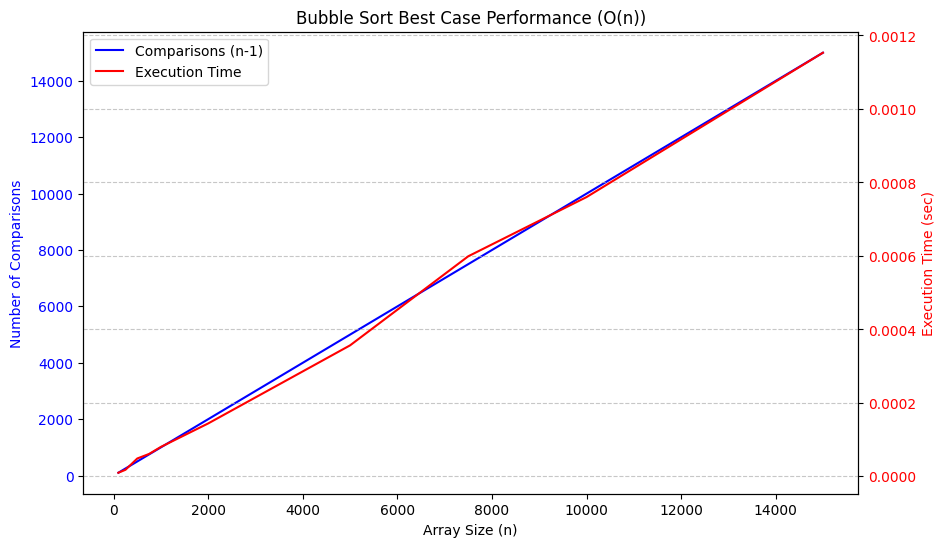

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))

# First y-axis - Comparisons
ax1 = plt.gca()
line1, = ax1.plot(sizeList, comparisonList, 'b-', label='Comparisons')
ax1.set_xlabel('Array Size (n)')
ax1.set_ylabel('Number of Comparisons', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis - Execution Time
ax2 = ax1.twinx()
line2, = ax2.plot(sizeList, avgTimeList, 'r-', label='Execution Time')
ax2.set_ylabel('Execution Time (sec)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Display title, legend and grid
plt.title('Bubble Sort Best Case Performance (O(n))')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(handles=[line1, line2], loc='upper left')
plt.show()

## Test 3: Worst Case Scenario
This test evaluates bubble sort's performance in its worst-case scenario: sorting a reverse-sorted array.

In [93]:
sizeList = [100, 250, 500, 750, 1000, 2000, 5000, 7500, 10000, 15000] # Define list of array sizes to test

# Create empty lists to collect data for graphing
comparisonList = []
avgTimeList = []

* It tests multiple array sizes to demonstrate how bubble sort's computational efficiency degrades with input size.
* For each specified array size:
  * A [reverse-sorted array](https://chatgpt.com/share/6817c7a1-aeb0-800f-a21b-3855a907191d) is created (worst case for bubble sort).
  * The algorithm is run to measure execution time.
  * Both the number of comparisons and execution time are recorded.

In [94]:
print("Size | Comparisons | Execution Time (sec)") 
print("-" * 40)

# Loop through each array size
for size in sizeList:
    # Create reverse sorted array - worst case for bubble sort
    testArray = list(range(size, 0, -1))
    
    startTime = time.time() # Record start time before sorting
    comparisons = bubbleSort(testArray) # Apply bubble sort and store comparison count
    executionTime = time.time() - startTime # Calculate execution time by finding difference
    
    print(f"{size} | {comparisons} | {executionTime:.10f}")

    # Append values to lists for plotting
    comparisonList.append(comparisons)
    avgTimeList.append(executionTime)

Size | Comparisons | Execution Time (sec)
----------------------------------------
100 | 4950 | 0.0010001659
250 | 31125 | 0.0029985905
500 | 124750 | 0.0169982910
750 | 280875 | 0.0369989872
1000 | 499500 | 0.0720019341
2000 | 1999000 | 0.3029999733
5000 | 12497500 | 1.8910784721
7500 | 28121250 | 4.1082258224
10000 | 49995000 | 7.7362241745
15000 | 112492500 | 16.6564586163


The results confirm bubble sort's worst-case complexity, showing:
* Approximately n^2/2 comparisons are made for each array.
* The execution time and number of comparisons increases quadratically with input size.
* Performance deteriorates significantly as input sizes grow larger.

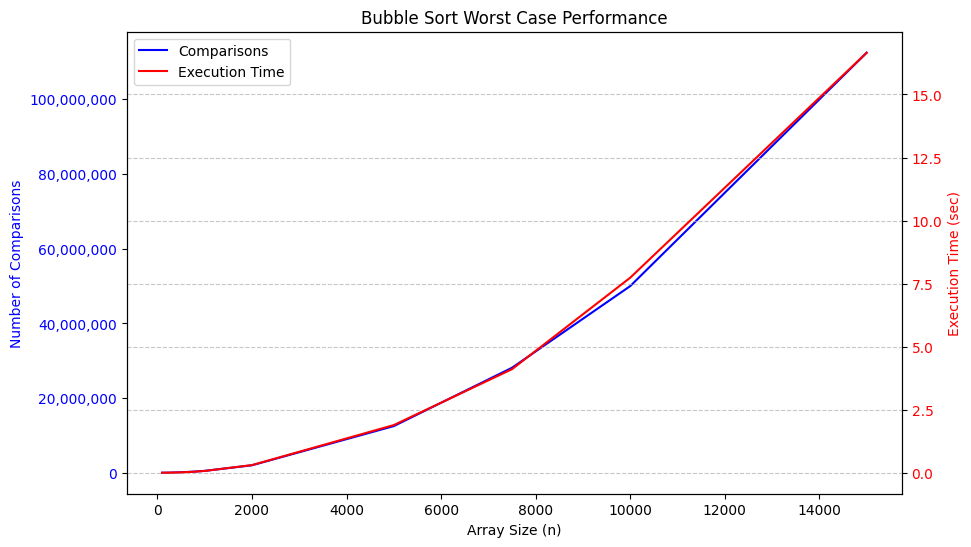

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))

# First y-axis - Comparisons
ax1 = plt.gca()
line1, = ax1.plot(sizeList, comparisonList, 'b-', label='Comparisons')
ax1.set_xlabel('Array Size (n)')
ax1.set_ylabel('Number of Comparisons', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format y-axis for better readability, since values are large.
# (https://chatgpt.com/share/6817de5f-ffe8-800f-aa9d-9d441aae846c)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Second y-axis - Execution Time
ax2 = ax1.twinx()
line2, = ax2.plot(sizeList, avgTimeList, 'r-', label='Execution Time')
ax2.set_ylabel('Execution Time (sec)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Display title, legend and grid
plt.title('Bubble Sort Worst Case Performance')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(handles=[line1, line2], loc='upper left')
plt.show()

## Test 4: Average Case Performance (O(n^2))
This test evaluates bubble sort's performance in an average-case scenario: sorting a randomly shuffled array.

In [101]:
sizeList = [100, 250, 500, 750, 1000, 2000, 5000, 7500, 10000, 15000] # Define list of array sizes to test

# Create empty lists to collect data for graphing
comparisonList = []
avgTimeList = []

* It tests multiple array sizes to demonstrate how bubble sort's computational efficiency performs with various inputs.
* For each specified array size:
  * An [array](https://chatgpt.com/share/6817c6b3-1594-800f-bbd1-8febd4d65d34) is generated and then randomly shuffled to create an average-case scenario.
  * The algorithm is run to measure execution time.
  * Both the number of comparisons and execution time are recorded.

In [102]:
print("Size | Comparisons | Execution Time (sec)") 
print("-" * 40)

# Loop through each array size
for size in sizeList:
    
    testArray = list(range(size)) # Generate test array 
    random.shuffle(testArray) # Randomize the array to create average case scenario
    
    startTime = time.time() # Record start time before sorting
    comparisons = bubbleSort(testArray) # Apply bubble sort and store comparison count
    executionTime = time.time() - startTime # Calculate execution time by finding difference
    
    print(f"{size} | {comparisons} | {executionTime:.10f}")

    # Append values to lists for plotting
    comparisonList.append(comparisons)
    avgTimeList.append(executionTime)

Size | Comparisons | Execution Time (sec)
----------------------------------------
100 | 4929 | 0.0000000000
250 | 30935 | 0.0029997826
500 | 124450 | 0.0129995346
750 | 278730 | 0.0419991016
1000 | 499004 | 0.0610005856
2000 | 1998565 | 0.2341091633
5000 | 12497035 | 1.5425117016
7500 | 28114110 | 3.3817479610
10000 | 49983219 | 6.1232776642
15000 | 112462854 | 13.4870195389


The results demonstrate bubble sort's O(n^2) average-case time complexity, showing:
* For randomly shuffled arrays, the number of comparisons is typically around n^2/2.
* The execution time and number of comparisons increases quadratically with input size.
* Despite execution time still increasing quadratically, performance is better than the worst-case scenario.

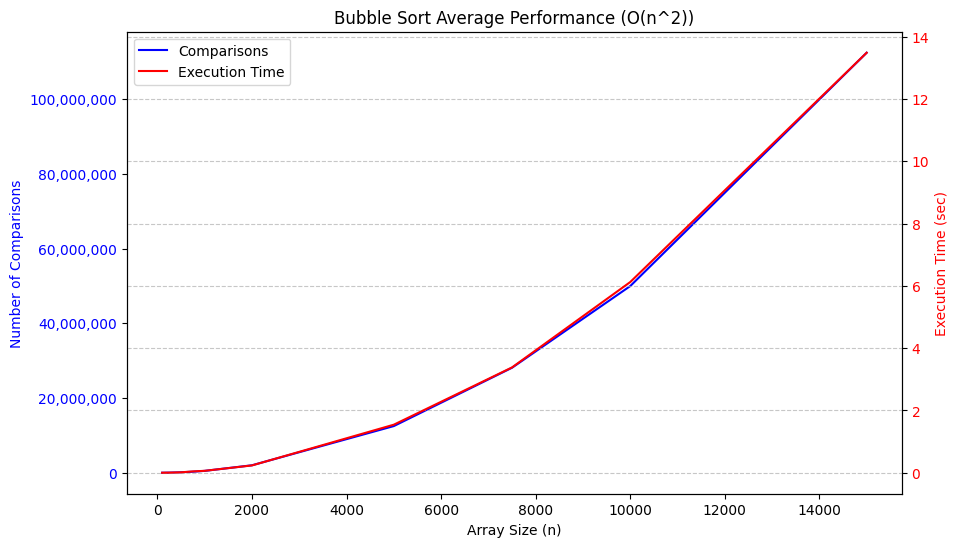

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))

# First y-axis - Comparisons
ax1 = plt.gca()
line1, = ax1.plot(sizeList, comparisonList, 'b-', label='Comparisons')
ax1.set_xlabel('Array Size (n)')
ax1.set_ylabel('Number of Comparisons', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format y-axis for better readability, since values are large.
# (https://chatgpt.com/share/6817de5f-ffe8-800f-aa9d-9d441aae846c)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Second y-axis - Execution Time
ax2 = ax1.twinx()
line2, = ax2.plot(sizeList, avgTimeList, 'r-', label='Execution Time')
ax2.set_ylabel('Execution Time (sec)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Display title, legend and grid
plt.title('Bubble Sort Average Performance (O(n^2))')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(handles=[line1, line2], loc='upper left')
plt.show()

# Academic Paper Bibliography
**[1]** -
National Institute of Standards and Technology (US). Secure hash standard.
    Technical Report NIST FIPS 180-4, National Institute of Standards and Tech-
    nology (U.S.), Washington, D.C., 2015. URL: https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    nistpubs/FIPS/NIST.FIPS.180-4.pdf, doi:10.6028/NIST.FIPS.180-4.

**[2]** -
Brian W. Kernighan and Dennis M. Ritchie. The C programming language.
Prentice-Hall software series. Prentice-Hall PTR, Upper Saddle River, NJ, 2.
ed., 52. print edition, 2014. URL: https://www.cimat.mx/ciencia_para_jovenes/bachillerato/libros/%5BKernighan-Ritchie%5DThe_C_Programming_Language.pdf

**[3]** -
Carl Pomerance. The Search for Prime Numbers. SCIENTIFIC AMERICAN,
247(6):12, 1982. URL: https://www.jstor.org/stable/24966751.

**[4]** -
D Abdullah, R Rahim, D Apdilah, S Efendi, T Tulus, and S Suwilo.
Prime Numbers Comparison using Sieve of Eratosthenes and Sieve of Sun-
daram Algorithm. Journal of Physics: Conference Series, 978:012123, March
2018. URL: https://iopscience.iop.org/article/10.1088/1742-6596/978/1/012123, doi:10.1088/1742-6596/978/1/012123.

**[5]** -
Mst Ayush Pardeshi, Sanchita A Jadhav, and Mr Nischal Nair.
“A Comparative study of calculating square roots using Heron’s
formula and a novel method discovered. 5(1), 2023. URL:
https://ijaem.net/issue_dcp/A%20Comparative%20study%20of%20calculating%20square%20roots%20using%20Heron%20s%20formula%20and%20a%20novel%20method%20discovered.pdf.

**[6]** -
Satoshi Nakamoto. Bitcoin: A Peer-to-Peer Electronic Cash System. URL:
https://bitcoin.org/bitcoin.pdf.

**[7]** -
Alan Mathison Turing. On computable numbers, with an application to the Entscheidungsproblem.
vol. 42(series 2):pp. 230–265, 1937. URL: https://people.math.ethz.ch/~halorenz/4students/Literatur/TuringFullText.pdf.

**[8]** -
Omar Khan Durrani and Sayed AbdulHayan. Performance Measurement of
Popular Sorting Algorithms Implemented using Java and Python. In 2022 In-
ternational Conference on Electrical, Computer, Communications and Mecha-
tronics Engineering (ICECCME), pages 1–6, Maldives, Maldives, November
2022. IEEE. URL: https://ieeexplore.ieee.org/document/9988424/,
doi:10.1109/ICECCME55909.2022.9988424.